In [1]:
import scipy.io as sio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.preprocessing import StandardScaler
from matplotlib import cm, colors, colorbar
import mne


nrem_dataframe = pd.read_csv('nrem_dataframe.csv') # previously saved dataset
# mat_contents = sio.loadmat('spectral_slope_output.mat')


In [24]:
nrem_dataframe

,DIFF_FROM_EVENT_SECONDS,DIN_EVENTS_WITHIN_TWO_MINUTES,Date,Date_Time,ENTRY_MATCHED_AWAKENING_NO,FILE_NOT_FOUND,HOLD_OUT,ID,Int,MFF_FILE_HAS_NO_EVENTS_TO_IMPORT,...,Q7,Q8,Q9,REM,SA,SES_PATH,Stage,Time,Visit,WAKE
0,38.636,1,NaN,11/19/0014 05:08,7.0,NaN,False,2000,RA,NaN,...,1.0,2.0,0.0,0.0,7,/Volumes/NCCAM/NCCAM/NCCAM3/Organize/NCCAM3_Wo...,2.0,5:08 AM,1,1.0
1,224.648,1,NaN,11/19/0014 01:00,1.0,NaN,True,2000,RA,NaN,...,1.0,3.0,0.0,0.0,1,/Volumes/NCCAM/NCCAM/NCCAM3/Organize/NCCAM3_Wo...,2.0,1:00 AM,1,1.0
2,1.118,2,NaN,11/19/0014 03:15,4.0,NaN,False,2000,RA,NaN,...,NaN,NaN,NaN,0.0,4,/Volumes/NCCAM/NCCAM/NCCAM3/Organize/NCCAM3_Wo...,2.0,3:15 AM,1,1.0
3,66.265,1,NaN,11/19/0014 01:38,2.0,NaN,False,2000,RA,NaN,...,0.0,1.0,1.0,0.0,2,/Volumes/NCCAM/NCCAM/NCCAM3/Organize/NCCAM3_Wo...,2.0,1:38 AM,1,1.0
4,38.338,1,NaN,11/19/0014 06:07,9.0,NaN,False,2000,RA,NaN,...,2.0,1.0,1.0,0.0,9,/Volumes/NCCAM/NCCAM/NCCAM3/Organize/NCCAM3_Wo...,NaN,6:07 AM,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,8.079,1,NaN,06/02/0017 05:40,6.0,NaN,True,2144,AMV,NaN,...,0.0,3.0,3.0,0.0,6,/Volumes/NCCAM/NCCAM/NCCAM3/Organize/NCCAM3_Wo...,NaN,5:40 AM,2,1.0
795,1.368,1,NaN,03/15/0017 01:40,2.0,NaN,False,2144,AMV,NaN,...,NaN,NaN,NaN,0.0,2,/Volumes/NCCAM/NCCAM/NCCAM3/Organize/NCCAM3_Wo...,2.0,1:40 AM,1,1.0
796,28.385,1,NaN,03/15/0017 02:17,3.0,NaN,False,2144,AMV,NaN,...,1.0,3.0,3.0,0.0,3,/Volumes/NCCAM/NCCAM/NCCAM3/Organize/NCCAM3_Wo...,2.0,2:17 AM,1,1.0
797,111.526,1,NaN,03/15/0017 04:04,5.0,NaN,True,2144,AMV,NaN,...,3.0,5.0,5.0,0.0,5,/Volumes/NCCAM/NCCAM/NCCAM3/Organize/NCCAM3_Wo...,2.0,4:04 AM,1,1.0


In [60]:
#              %store output in structure
#              data.path = T.PATH(file);
#              data.chanlocs = EEG.chanlocs(chan);
# %                  data.intSlo = intSlo;
# %                  data.stat = stat;
# %                  data.Pows = Pows;
#              data.Deviants = Deviants;
# %                  data.stat0 = stat0;
#              data.intSlo0 = intSlo0;
#              data.freqrange = frBand;
#              data.timerange = timerange;
                 
#              data.Pows = Pows;
             
#              data.spectralexp_all = chanavg; % spectral exponent for each channel
#              data.obs_freq_all = obsavg; % observed frequencies for each channel (matrix)
             
#              data.meanspectralexp = mean(chanavg);
#              data.obs_freq_avg = mean(obsavg);

#              output = [data output];

In [25]:
# set data origin folder
data_folder = "/data/tvanasse/nccam3/"

In [6]:
# # should be 976 samples * 2 time ranges * 3 freq ranges = 5856
# import h5py

# f = h5py.File(data_folder + 'spectral_slope_output.mat','r')
# list(f.keys())
# struArray = f['output']
# # f[struArray['freqrange'][5855,0]].value 


In [6]:
# rsync -n -avP --exclude "cleaning-sa" . tvanasse@tononi-1:/data/tvanasse/nccam3

In [7]:
# nrem_dataframe["SPECEXP_1-20_ALL"] = np.array(0).astype('object') #create object for 
# nrem_dataframe["OBS_1-20"] = np.array(0).astype('object') #create object for 
# nrem_dataframe["OBS_1-20_ALL"] = np.array(0).astype('object') #create object for 
# nrem_dataframe["FREQ_1-20"] = np.array(0).astype('object') #create object for

# nrem_dataframe["SPECEXP_20-40_ALL"] = np.array(0).astype('object') #create object for 
# nrem_dataframe["OBS_20-40"] = np.array(0).astype('object') #create object for 
# nrem_dataframe["OBS_20-40_ALL"] = np.array(0).astype('object') #create object for 
# nrem_dataframe["FREQ_20-40"] = np.array(0).astype('object') #create object for 

# nrem_dataframe["SPECEXP_1-40_ALL"] = np.array(0).astype('object') #create object for 
# nrem_dataframe["OBS_1-40"] = np.array(0).astype('object') #create object for 
# nrem_dataframe["OBS_1-40_ALL"] = np.array(0).astype('object') #create object for 
# nrem_dataframe["FREQ_1-40"] = np.array(0).astype('object') #create object for 

# # get spectral exponents & set timerange (1 or 2 minutes before awakening)
# timerange = 2 # minutes before awakening
# for i in range(0,5856):
#     print(i)
    
#     if (str(np.squeeze(f[struArray['freqrange'][i,0]].value)) == '[ 1. 20.]') & (int(f[struArray['timerange'][i,0]].value) == timerange):
#         nrem_dataframe.loc[nrem_dataframe[nrem_dataframe["PATH"] == f[struArray['path'][i, 0]].value.tobytes()[::2].decode()].index.values,"SPECEXP_1-20"] = np.squeeze(f[struArray['meanspectralexp'][i,0]].value)
#         nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == f[struArray['path'][i, 0]].value.tobytes()[::2].decode()].index.values),"SPECEXP_1-20_ALL"] = np.squeeze(f[struArray['spectralexp_all'][i,0]].value).tolist()
#         nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == f[struArray['path'][i, 0]].value.tobytes()[::2].decode()].index.values),"OBS_1-20"] = np.squeeze(f[struArray['obs_freq_avg'][i,0]].value).tolist()
#         nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == f[struArray['path'][i, 0]].value.tobytes()[::2].decode()].index.values),"OBS_1-20_ALL"] = np.squeeze(f[struArray['obs_freq_all'][i,0]].value).tolist()
#         nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == f[struArray['path'][i, 0]].value.tobytes()[::2].decode()].index.values),"FREQ_1-20"] = np.squeeze(f[struArray['freqbins'][i,0]].value).tolist()
    
#     elif (str(np.squeeze(f[struArray['freqrange'][i,0]].value)) == '[20. 40.]') & (int(f[struArray['timerange'][i,0]].value) == timerange):
#         nrem_dataframe.loc[nrem_dataframe[nrem_dataframe["PATH"] == f[struArray['path'][i, 0]].value.tobytes()[::2].decode()].index.values,"SPECEXP_20-40"] = np.squeeze(f[struArray['meanspectralexp'][i,0]].value)
#         nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == f[struArray['path'][i, 0]].value.tobytes()[::2].decode()].index.values),"SPECEXP_20-40_ALL"] = np.squeeze(f[struArray['spectralexp_all'][i,0]].value).tolist()
#         nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == f[struArray['path'][i, 0]].value.tobytes()[::2].decode()].index.values),"OBS_20-40"]= np.squeeze(f[struArray['obs_freq_avg'][i,0]].value).tolist()
#         nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == f[struArray['path'][i, 0]].value.tobytes()[::2].decode()].index.values),"OBS_20-40_ALL"]= np.squeeze(f[struArray['obs_freq_all'][i,0]].value).tolist()
#         nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == f[struArray['path'][i, 0]].value.tobytes()[::2].decode()].index.values),"FREQ_20-40"]= np.squeeze(f[struArray['freqbins'][i,0]].value).tolist()
    
#     elif (str(np.squeeze(f[struArray['freqrange'][i,0]].value)) == '[ 1. 40.]') & (int(f[struArray['timerange'][i,0]].value) == timerange):
#         nrem_dataframe.loc[nrem_dataframe[nrem_dataframe["PATH"] == f[struArray['path'][i, 0]].value.tobytes()[::2].decode()].index.values,"SPECEXP_1-40"] = np.squeeze(f[struArray['meanspectralexp'][i,0]].value)
#         nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == f[struArray['path'][i, 0]].value.tobytes()[::2].decode()].index.values),"SPECEXP_1-40_ALL"] = np.squeeze(f[struArray['spectralexp_all'][i,0]].value).tolist()
#         nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == f[struArray['path'][i, 0]].value.tobytes()[::2].decode()].index.values),"OBS_1-40"]= np.squeeze(f[struArray['obs_freq_avg'][i,0]].value).tolist()
#         nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == f[struArray['path'][i, 0]].value.tobytes()[::2].decode()].index.values),"OBS_1-40_ALL"]= np.squeeze(f[struArray['obs_freq_all'][i,0]].value).tolist()
#         nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == f[struArray['path'][i, 0]].value.tobytes()[::2].decode()].index.values),"FREQ_1-40"]= np.squeeze(f[struArray['freqbins'][i,0]].value).tolist()
     

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


/home/tvanasse/miniconda/envs/nsddata/lib/python3.7/site-packages/ipykernel_launcher.py:21: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
/home/tvanasse/miniconda/envs/nsddata/lib/python3.7/site-packages/ipykernel_launcher.py:28: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
/home/tvanasse/miniconda/envs/nsddata/lib/python3.7/site-packages/ipykernel_launcher.py:29: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
/home/tvanasse/miniconda/envs/nsddata/lib/python3.7/site-packages/ipykernel_launcher.py:30: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
/home/tvanasse/miniconda/envs/nsddata/lib/python3.7/site-packages/ipykernel_launcher.py:31: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
/home/tvanasse/miniconda/envs/nsddata/lib/python3.7/site-packages/ipykernel_launcher.py:32: H5pyDeprecationWarning: data

19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
2

1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080


3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753


5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409


In [40]:
data_folder = '/data/tvanasse/nccam3/'

nrem_dataframe["PSDS_30SEC_1TO50HZ"] = np.array(0).astype('object') #create object so arrays can be added

psds_list = []
for i in range(0,len(nrem_dataframe)):
    print(i)
    start_index = nrem_dataframe['PATH'][i].find('sub')
    nrem_dataframe.loc[i,'SHORT_PATH'] = nrem_dataframe['PATH'][i][start_index:]

    raw = mne.io.read_raw_eeglab(data_folder + nrem_dataframe['PATH'][i][start_index:])

    psds, freqs = mne.time_frequency.psd_welch(raw,
                                               tmin = raw.times[-1]-30,
                                               tmax = raw.times[-1],
                                               fmin=1., fmax=50.,
                                               n_fft=1024,
                                               average="median",
    #                                            n_overlap = 50,
    #                                            average=None,
    #                                            n_jobs=15)
                                              )

    nrem_dataframe.at[i,"PSDS_30SEC_1TO50HZ"] = psds.tolist()

0
Reading /data/tvanasse/nccam3/sub-2000/eeg/ses-1/awakening-7-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
1
Reading /data/tvanasse/nccam3/sub-2000/eeg/ses-1/awakening-4-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
2
Reading /data/tvanasse/nccam3/sub-2000/eeg/ses-1/awakening-2-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
3
Reading /data/tvanasse/nccam3/sub-2000/eeg/ses-1/awakening-9-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
4
Reading /data/tvanasse/nccam3/sub-2000/eeg/ses-1/awakening-5-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
5
Reading /data/tvanasse/nccam3/sub-2000/eeg/ses-1/awakening-8-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
6
Reading /data/tvanasse/nccam3/sub-2000/eeg/ses-1/awakening-3-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
7
Reading /data/tvanasse/nccam3/sub-2001/eeg/ses-3/awakening-5-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
8
Reading /data/tvanasse/nccam3/sub-2001/eeg/ses-3/awakening-4-cleaned2_nrem.fdt

Effective window size : 2.048 (s)
71
Reading /data/tvanasse/nccam3/sub-2029/eeg/ses-2/awakening-4-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
72
Reading /data/tvanasse/nccam3/sub-2030/eeg/ses-1/awakening-1-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
73
Reading /data/tvanasse/nccam3/sub-2030/eeg/ses-1/awakening-6-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
74
Reading /data/tvanasse/nccam3/sub-2030/eeg/ses-1/awakening-3-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
75
Reading /data/tvanasse/nccam3/sub-2030/eeg/ses-1/awakening-10-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
76
Reading /data/tvanasse/nccam3/sub-2030/eeg/ses-1/awakening-2-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
77
Reading /data/tvanasse/nccam3/sub-2030/eeg/ses-1/awakening-9-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
78
Reading /data/tvanasse/nccam3/sub-2031/eeg/ses-1/awakening-4-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
79
Reading /data/tvanasse/nccam3/sub-

141
Reading /data/tvanasse/nccam3/sub-2053/eeg/ses-2/awakening-4-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
142
Reading /data/tvanasse/nccam3/sub-2053/eeg/ses-2/awakening-5-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
143
Reading /data/tvanasse/nccam3/sub-2054/eeg/ses-3/awakening-5-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
144
Reading /data/tvanasse/nccam3/sub-2054/eeg/ses-3/awakening-8-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
145
Reading /data/tvanasse/nccam3/sub-2054/eeg/ses-2/awakening-2-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
146
Reading /data/tvanasse/nccam3/sub-2054/eeg/ses-2/awakening-1-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
147
Reading /data/tvanasse/nccam3/sub-2055/eeg/ses-2/awakening-6-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
148
Reading /data/tvanasse/nccam3/sub-2055/eeg/ses-2/awakening-1-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
149
Reading /data/tvanasse/nccam3/sub-2055/eeg/ses-2/awakening-4

211
Reading /data/tvanasse/nccam3/sub-2069/eeg/ses-2/awakening-4-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
212
Reading /data/tvanasse/nccam3/sub-2069/eeg/ses-1/awakening-1-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
213
Reading /data/tvanasse/nccam3/sub-2069/eeg/ses-1/awakening-10-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
214
Reading /data/tvanasse/nccam3/sub-2069/eeg/ses-1/awakening-8-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
215
Reading /data/tvanasse/nccam3/sub-2070/eeg/ses-1/awakening-10-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
216
Reading /data/tvanasse/nccam3/sub-2070/eeg/ses-1/awakening-8-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
217
Reading /data/tvanasse/nccam3/sub-2070/eeg/ses-1/awakening-3-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
218
Reading /data/tvanasse/nccam3/sub-2070/eeg/ses-1/awakening-4-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
219
Reading /data/tvanasse/nccam3/sub-2070/eeg/ses-1/awakening

281
Reading /data/tvanasse/nccam3/sub-2087/eeg/ses-3/awakening-6-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
282
Reading /data/tvanasse/nccam3/sub-2087/eeg/ses-3/awakening-1-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
283
Reading /data/tvanasse/nccam3/sub-2087/eeg/ses-3/awakening-2-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
284
Reading /data/tvanasse/nccam3/sub-2087/eeg/ses-3/awakening-10-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
285
Reading /data/tvanasse/nccam3/sub-2087/eeg/ses-3/awakening-4-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
286
Reading /data/tvanasse/nccam3/sub-2087/eeg/ses-3/awakening-8-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
287
Reading /data/tvanasse/nccam3/sub-2087/eeg/ses-3/awakening-3-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
288
Reading /data/tvanasse/nccam3/sub-2087/eeg/ses-3/awakening-5-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
289
Reading /data/tvanasse/nccam3/sub-2087/eeg/ses-3/awakening-

351
Reading /data/tvanasse/nccam3/sub-2123/eeg/ses-1/awakening-3-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
352
Reading /data/tvanasse/nccam3/sub-2123/eeg/ses-1/awakening-8-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
353
Reading /data/tvanasse/nccam3/sub-2123/eeg/ses-2/awakening-4-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
354
Reading /data/tvanasse/nccam3/sub-2126/eeg/ses-1/awakening-6-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
355
Reading /data/tvanasse/nccam3/sub-2126/eeg/ses-1/awakening-1-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
356
Reading /data/tvanasse/nccam3/sub-2126/eeg/ses-1/awakening-3-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
357
Reading /data/tvanasse/nccam3/sub-2126/eeg/ses-1/awakening-8-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
358
Reading /data/tvanasse/nccam3/sub-2127/eeg/ses-2/awakening-2-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
359
Reading /data/tvanasse/nccam3/sub-2127/eeg/ses-2/awakening-6

421
Reading /data/tvanasse/nccam3/sub-2144/eeg/ses-3/awakening-7-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
422
Reading /data/tvanasse/nccam3/sub-2144/eeg/ses-3/awakening-2-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
423
Reading /data/tvanasse/nccam3/sub-2144/eeg/ses-3/awakening-10-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
424
Reading /data/tvanasse/nccam3/sub-2144/eeg/ses-3/awakening-3-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
425
Reading /data/tvanasse/nccam3/sub-2144/eeg/ses-3/awakening-5-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
426
Reading /data/tvanasse/nccam3/sub-2144/eeg/ses-2/awakening-5-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
427
Reading /data/tvanasse/nccam3/sub-2144/eeg/ses-2/awakening-3-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
428
Reading /data/tvanasse/nccam3/sub-2144/eeg/ses-2/awakening-4-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
429
Reading /data/tvanasse/nccam3/sub-2144/eeg/ses-2/awakening-

In [27]:
data_folder = '/data/tvanasse/nccam3/'

nrem_dataframe["PSDS_AWAKENING_MEDIAN"] = np.array(0).astype('object') #create object so arrays can be added

# psds_list = []

start_index = nrem_dataframe['PATH'][0].find('sub') # start index is the same for each subject

for i in range(0,len(nrem_dataframe)):
    print(i)
    
    nrem_dataframe.loc[i,'SHORT_PATH'] = nrem_dataframe['PATH'][i][start_index:]

    raw = mne.io.read_raw_eeglab(data_folder + nrem_dataframe['PATH'][i][start_index:])

    psds, freqs = mne.time_frequency.psd_welch(raw,
                                               tmin = 0,
                                               tmax = raw.times[-1],
                                               fmin=1., fmax=50.,
                                               n_fft=1024,
                                               average="median",
    #                                            n_overlap = 50,
    #                                            average=None,
#                                                n_jobs=40
                                              )

    # mark the median for each awakening of the night
    nrem_dataframe.at[i,"PSDS_AWAKENING_MEDIAN"] = psds.tolist()

0
Reading /data/tvanasse/nccam3/sub-2000/eeg/ses-1/awakening-7-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
1
Reading /data/tvanasse/nccam3/sub-2000/eeg/ses-1/awakening-1-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
2
Reading /data/tvanasse/nccam3/sub-2000/eeg/ses-1/awakening-4-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
3
Reading /data/tvanasse/nccam3/sub-2000/eeg/ses-1/awakening-2-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
4
Reading /data/tvanasse/nccam3/sub-2000/eeg/ses-1/awakening-9-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
5
Reading /data/tvanasse/nccam3/sub-2000/eeg/ses-1/awakening-5-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
6
Reading /data/tvanasse/nccam3/sub-2000/eeg/ses-1/awakening-8-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
7
Reading /data/tvanasse/nccam3/sub-2000/eeg/ses-1/awakening-3-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
8
Reading /data/tvanasse/nccam3/sub-2001/eeg/ses-3/awakening-3-cleaned2_nrem.fdt

Effective window size : 2.048 (s)
71
Reading /data/tvanasse/nccam3/sub-2008/eeg/ses-1/awakening-3-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
72
Reading /data/tvanasse/nccam3/sub-2008/eeg/ses-1/awakening-5-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
73
Reading /data/tvanasse/nccam3/sub-2008/eeg/ses-1/awakening-9-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
74
Reading /data/tvanasse/nccam3/sub-2008/eeg/ses-1/awakening-2-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
75
Reading /data/tvanasse/nccam3/sub-2008/eeg/ses-1/awakening-4-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
76
Reading /data/tvanasse/nccam3/sub-2008/eeg/ses-1/awakening-1-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
77
Reading /data/tvanasse/nccam3/sub-2008/eeg/ses-1/awakening-7-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
78
Reading /data/tvanasse/nccam3/sub-2008/eeg/ses-1/awakening-6-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
79
Reading /data/tvanasse/nccam3/sub-2

141
Reading /data/tvanasse/nccam3/sub-2029/eeg/ses-1/awakening-4-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
142
Reading /data/tvanasse/nccam3/sub-2029/eeg/ses-1/awakening-5-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
143
Reading /data/tvanasse/nccam3/sub-2029/eeg/ses-1/awakening-1-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
144
Reading /data/tvanasse/nccam3/sub-2029/eeg/ses-2/awakening-3-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
145
Reading /data/tvanasse/nccam3/sub-2029/eeg/ses-2/awakening-5-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
146
Reading /data/tvanasse/nccam3/sub-2029/eeg/ses-2/awakening-2-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
147
Reading /data/tvanasse/nccam3/sub-2029/eeg/ses-2/awakening-10-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
148
Reading /data/tvanasse/nccam3/sub-2029/eeg/ses-2/awakening-4-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
149
Reading /data/tvanasse/nccam3/sub-2030/eeg/ses-1/awakening-

211
Reading /data/tvanasse/nccam3/sub-2041/eeg/ses-1/awakening-4-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
212
Reading /data/tvanasse/nccam3/sub-2041/eeg/ses-1/awakening-3-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
213
Reading /data/tvanasse/nccam3/sub-2041/eeg/ses-1/awakening-5-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
214
Reading /data/tvanasse/nccam3/sub-2042/eeg/ses-1/awakening-4-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
215
Reading /data/tvanasse/nccam3/sub-2042/eeg/ses-1/awakening-2-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
216
Reading /data/tvanasse/nccam3/sub-2042/eeg/ses-1/awakening-9-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
217
Reading /data/tvanasse/nccam3/sub-2042/eeg/ses-1/awakening-5-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
218
Reading /data/tvanasse/nccam3/sub-2042/eeg/ses-1/awakening-3-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
219
Reading /data/tvanasse/nccam3/sub-2042/eeg/ses-1/awakening-6

281
Reading /data/tvanasse/nccam3/sub-2052/eeg/ses-1/awakening-2-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
282
Reading /data/tvanasse/nccam3/sub-2052/eeg/ses-1/awakening-11-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
283
Reading /data/tvanasse/nccam3/sub-2053/eeg/ses-2/awakening-4-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
284
Reading /data/tvanasse/nccam3/sub-2053/eeg/ses-2/awakening-2-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
285
Reading /data/tvanasse/nccam3/sub-2053/eeg/ses-2/awakening-5-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
286
Reading /data/tvanasse/nccam3/sub-2053/eeg/ses-2/awakening-3-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
287
Reading /data/tvanasse/nccam3/sub-2053/eeg/ses-2/awakening-1-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
288
Reading /data/tvanasse/nccam3/sub-2054/eeg/ses-3/awakening-7-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
289
Reading /data/tvanasse/nccam3/sub-2054/eeg/ses-3/awakening-

351
Reading /data/tvanasse/nccam3/sub-2063/eeg/ses-3/awakening-3-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
352
Reading /data/tvanasse/nccam3/sub-2063/eeg/ses-3/awakening-6-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
353
Reading /data/tvanasse/nccam3/sub-2063/eeg/ses-3/awakening-7-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
354
Reading /data/tvanasse/nccam3/sub-2063/eeg/ses-3/awakening-1-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
355
Reading /data/tvanasse/nccam3/sub-2064/eeg/ses-2/awakening-9-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
356
Reading /data/tvanasse/nccam3/sub-2064/eeg/ses-2/awakening-2-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
357
Reading /data/tvanasse/nccam3/sub-2064/eeg/ses-2/awakening-4-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
358
Reading /data/tvanasse/nccam3/sub-2064/eeg/ses-2/awakening-3-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
359
Reading /data/tvanasse/nccam3/sub-2064/eeg/ses-2/awakening-8

421
Reading /data/tvanasse/nccam3/sub-2070/eeg/ses-1/awakening-10-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
422
Reading /data/tvanasse/nccam3/sub-2070/eeg/ses-1/awakening-8-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
423
Reading /data/tvanasse/nccam3/sub-2070/eeg/ses-1/awakening-3-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
424
Reading /data/tvanasse/nccam3/sub-2070/eeg/ses-1/awakening-4-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
425
Reading /data/tvanasse/nccam3/sub-2070/eeg/ses-1/awakening-2-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
426
Reading /data/tvanasse/nccam3/sub-2070/eeg/ses-1/awakening-9-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
427
Reading /data/tvanasse/nccam3/sub-2070/eeg/ses-1/awakening-1-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
428
Reading /data/tvanasse/nccam3/sub-2070/eeg/ses-1/awakening-6-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
429
Reading /data/tvanasse/nccam3/sub-2071/eeg/ses-1/awakening-

491
Reading /data/tvanasse/nccam3/sub-2080/eeg/ses-1/awakening-5-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
492
Reading /data/tvanasse/nccam3/sub-2080/eeg/ses-1/awakening-6-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
493
Reading /data/tvanasse/nccam3/sub-2080/eeg/ses-1/awakening-1-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
494
Reading /data/tvanasse/nccam3/sub-2082/eeg/ses-1/awakening-1-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
495
Reading /data/tvanasse/nccam3/sub-2082/eeg/ses-1/awakening-4-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
496
Reading /data/tvanasse/nccam3/sub-2082/eeg/ses-1/awakening-2-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
497
Reading /data/tvanasse/nccam3/sub-2083/eeg/ses-1/awakening-6-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
498
Reading /data/tvanasse/nccam3/sub-2083/eeg/ses-1/awakening-11-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
499
Reading /data/tvanasse/nccam3/sub-2083/eeg/ses-1/awakening-

561
Reading /data/tvanasse/nccam3/sub-2092/eeg/ses-1/awakening-10-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
562
Reading /data/tvanasse/nccam3/sub-2092/eeg/ses-1/awakening-8-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
563
Reading /data/tvanasse/nccam3/sub-2092/eeg/ses-1/awakening-5-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
564
Reading /data/tvanasse/nccam3/sub-2092/eeg/ses-1/awakening-2-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
565
Reading /data/tvanasse/nccam3/sub-2092/eeg/ses-1/awakening-4-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
566
Reading /data/tvanasse/nccam3/sub-2092/eeg/ses-1/awakening-12-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
567
Reading /data/tvanasse/nccam3/sub-2095/eeg/ses-1/awakening-5-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
568
Reading /data/tvanasse/nccam3/sub-2095/eeg/ses-1/awakening-3-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
569
Reading /data/tvanasse/nccam3/sub-2096/eeg/ses-1/awakening

631
Reading /data/tvanasse/nccam3/sub-2111/eeg/ses-3/awakening-1-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
632
Reading /data/tvanasse/nccam3/sub-2111/eeg/ses-3/awakening-10-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
633
Reading /data/tvanasse/nccam3/sub-2111/eeg/ses-3/awakening-8-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
634
Reading /data/tvanasse/nccam3/sub-2111/eeg/ses-3/awakening-3-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
635
Reading /data/tvanasse/nccam3/sub-2111/eeg/ses-3/awakening-4-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
636
Reading /data/tvanasse/nccam3/sub-2111/eeg/ses-3/awakening-9-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
637
Reading /data/tvanasse/nccam3/sub-2112/eeg/ses-1/awakening-6-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
638
Reading /data/tvanasse/nccam3/sub-2112/eeg/ses-1/awakening-3-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
639
Reading /data/tvanasse/nccam3/sub-2112/eeg/ses-1/awakening-

701
Reading /data/tvanasse/nccam3/sub-2129/eeg/ses-1/awakening-14-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
702
Reading /data/tvanasse/nccam3/sub-2129/eeg/ses-1/awakening-8-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
703
Reading /data/tvanasse/nccam3/sub-2129/eeg/ses-1/awakening-3-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
704
Reading /data/tvanasse/nccam3/sub-2129/eeg/ses-1/awakening-11-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
705
Reading /data/tvanasse/nccam3/sub-2129/eeg/ses-1/awakening-6-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
706
Reading /data/tvanasse/nccam3/sub-2129/eeg/ses-1/awakening-7-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
707
Reading /data/tvanasse/nccam3/sub-2129/eeg/ses-1/awakening-1-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
708
Reading /data/tvanasse/nccam3/sub-2130/eeg/ses-1/awakening-7-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
709
Reading /data/tvanasse/nccam3/sub-2130/eeg/ses-1/awakening

771
Reading /data/tvanasse/nccam3/sub-2142/eeg/ses-3/awakening-4-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
772
Reading /data/tvanasse/nccam3/sub-2142/eeg/ses-3/awakening-2-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
773
Reading /data/tvanasse/nccam3/sub-2142/eeg/ses-3/awakening-9-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
774
Reading /data/tvanasse/nccam3/sub-2142/eeg/ses-1/awakening-8-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
775
Reading /data/tvanasse/nccam3/sub-2142/eeg/ses-1/awakening-12-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
776
Reading /data/tvanasse/nccam3/sub-2142/eeg/ses-1/awakening-3-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
777
Reading /data/tvanasse/nccam3/sub-2142/eeg/ses-1/awakening-5-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
778
Reading /data/tvanasse/nccam3/sub-2142/eeg/ses-1/awakening-2-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
779
Reading /data/tvanasse/nccam3/sub-2142/eeg/ses-1/awakening-

In [28]:
data_folder = '/data/tvanasse/nccam3/'

nrem_dataframe["PSDS_ALL_MEDIAN"] = np.array(0).astype('object') #create object so arrays can be added

# psds_list = []

start_index = nrem_dataframe['PATH'][0].find('sub') # start index is the same for each subject

for i in range(0,len(nrem_dataframe["SES_PATH"].unique())):
    print(i)
    nrem_dataframe["SES_PATH"].unique()
    
    
    nrem_dataframe.loc[i,'SHORT_PATH'] = nrem_dataframe['PATH'][i][start_index:]

#     raw = mne.io.read_raw_eeglab(data_folder + nrem_dataframe['PATH'][i][start_index:])
    
    # median psd across all awakenings for that night
    raw_ses = []
    for j in range(0,len(nrem_dataframe[nrem_dataframe['SES_PATH'] == nrem_dataframe["SES_PATH"].unique()[i]])):
        raw_ses.append(data_folder + nrem_dataframe.loc[nrem_dataframe[nrem_dataframe['SES_PATH'] == nrem_dataframe["SES_PATH"].unique()[i]].index,'PATH'].values[j][start_index:])

    raw = mne.io.read_raw_eeglab(raw_ses[0])
    add = []
    for k in range(1,len(raw_ses)):
        add.append(mne.io.read_raw_eeglab(raw_ses[k]))
    raw.append(add)

    psds, freqs = mne.time_frequency.psd_welch(raw,
                                               tmin = 0,
                                               tmax = raw.times[-1],
                                               fmin=1., fmax=50.,
                                               n_fft=1024,
                                               average="median",
    #                                            n_overlap = 50,
    #                                            average=None,
#                                                n_jobs=40
                                              )

    # mark the median for each awakening of the night
    for z in range(0,len(nrem_dataframe[nrem_dataframe['SES_PATH'] == nrem_dataframe["SES_PATH"].unique()[i]].index)):
        nrem_dataframe.at[nrem_dataframe[nrem_dataframe['SES_PATH'] == nrem_dataframe["SES_PATH"].unique()[i]].index[z],
                      "PSDS_ALL_MEDIAN"] = psds.tolist()

0
Reading /data/tvanasse/nccam3/sub-2000/eeg/ses-1/awakening-7-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2000/eeg/ses-1/awakening-1-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2000/eeg/ses-1/awakening-4-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2000/eeg/ses-1/awakening-2-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2000/eeg/ses-1/awakening-9-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2000/eeg/ses-1/awakening-5-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2000/eeg/ses-1/awakening-8-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2000/eeg/ses-1/awakening-3-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
1
Reading /data/tvanasse/nccam3/sub-2001/eeg/ses-3/awakening-3-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2001/eeg/ses-3/awakening-5-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2001/eeg/ses-3/awakening-2-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2001/eeg/ses-3/awakening-4-cleaned2_nrem.fdt
Reading /data/

Effective window size : 2.048 (s)
16
Reading /data/tvanasse/nccam3/sub-2022/eeg/ses-2/awakening-8-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2022/eeg/ses-2/awakening-3-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2022/eeg/ses-2/awakening-5-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2022/eeg/ses-2/awakening-1-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2022/eeg/ses-2/awakening-7-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
17
Reading /data/tvanasse/nccam3/sub-2022/eeg/ses-1/awakening-5-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2022/eeg/ses-1/awakening-3-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2022/eeg/ses-1/awakening-4-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2022/eeg/ses-1/awakening-2-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2022/eeg/ses-1/awakening-1-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
18
Reading /data/tvanasse/nccam3/sub-2023/eeg/ses-2/awakening-7-cleaned2_nrem.fdt
Reading /data/tvanas

Reading /data/tvanasse/nccam3/sub-2035/eeg/ses-2/awakening-3-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
32
Reading /data/tvanasse/nccam3/sub-2037/eeg/ses-3/awakening-7-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2037/eeg/ses-3/awakening-1-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2037/eeg/ses-3/awakening-3-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2037/eeg/ses-3/awakening-8-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2037/eeg/ses-3/awakening-4-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2037/eeg/ses-3/awakening-2-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
33
Reading /data/tvanasse/nccam3/sub-2037/eeg/ses-1/awakening-4-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2037/eeg/ses-1/awakening-2-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2037/eeg/ses-1/awakening-5-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2037/eeg/ses-1/awakening-1-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
34
Reading /data/tvanas

Effective window size : 2.048 (s)
47
Reading /data/tvanasse/nccam3/sub-2054/eeg/ses-2/awakening-3-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2054/eeg/ses-2/awakening-2-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2054/eeg/ses-2/awakening-1-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
48
Reading /data/tvanasse/nccam3/sub-2054/eeg/ses-1/awakening-2-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2054/eeg/ses-1/awakening-3-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
49
Reading /data/tvanasse/nccam3/sub-2055/eeg/ses-2/awakening-6-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2055/eeg/ses-2/awakening-1-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2055/eeg/ses-2/awakening-7-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2055/eeg/ses-2/awakening-2-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2055/eeg/ses-2/awakening-4-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2055/eeg/ses-2/awakening-3-cleaned2_nrem.fdt
Reading /data/tvanas

Reading /data/tvanasse/nccam3/sub-2067/eeg/ses-1/awakening-2-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2067/eeg/ses-1/awakening-7-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2067/eeg/ses-1/awakening-1-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2067/eeg/ses-1/awakening-10-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
62
Reading /data/tvanasse/nccam3/sub-2068/eeg/ses-2/awakening-6-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2068/eeg/ses-2/awakening-12-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2068/eeg/ses-2/awakening-1-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2068/eeg/ses-2/awakening-13-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2068/eeg/ses-2/awakening-2-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2068/eeg/ses-2/awakening-9-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2068/eeg/ses-2/awakening-8-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2068/eeg/ses-2/awakening-3-cleaned2_nrem.fdt
Reading /dat

Reading /data/tvanasse/nccam3/sub-2078/eeg/ses-3/awakening-7-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2078/eeg/ses-3/awakening-9-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2078/eeg/ses-3/awakening-3-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2078/eeg/ses-3/awakening-5-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
78
Reading /data/tvanasse/nccam3/sub-2080/eeg/ses-1/awakening-2-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2080/eeg/ses-1/awakening-4-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2080/eeg/ses-1/awakening-5-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2080/eeg/ses-1/awakening-6-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2080/eeg/ses-1/awakening-1-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
79
Reading /data/tvanasse/nccam3/sub-2082/eeg/ses-1/awakening-1-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2082/eeg/ses-1/awakening-4-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2082/eeg/ses-1/awakenin

Reading /data/tvanasse/nccam3/sub-2099/eeg/ses-3/awakening-8-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
93
Reading /data/tvanasse/nccam3/sub-2101/eeg/ses-3/awakening-8-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2101/eeg/ses-3/awakening-3-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2101/eeg/ses-3/awakening-4-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2101/eeg/ses-3/awakening-2-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2101/eeg/ses-3/awakening-6-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
94
Reading /data/tvanasse/nccam3/sub-2103/eeg/ses-1/awakening-7-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2103/eeg/ses-1/awakening-17-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2103/eeg/ses-1/awakening-1-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2103/eeg/ses-1/awakening-16-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2103/eeg/ses-1/awakening-6-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2103/eeg/ses-1/awaken

Reading /data/tvanasse/nccam3/sub-2126/eeg/ses-1/awakening-4-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2126/eeg/ses-1/awakening-3-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2126/eeg/ses-1/awakening-8-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
108
Reading /data/tvanasse/nccam3/sub-2127/eeg/ses-2/awakening-4-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2127/eeg/ses-2/awakening-2-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2127/eeg/ses-2/awakening-5-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2127/eeg/ses-2/awakening-3-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2127/eeg/ses-2/awakening-6-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2127/eeg/ses-2/awakening-11-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2127/eeg/ses-2/awakening-7-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2127/eeg/ses-2/awakening-1-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
109
Reading /data/tvanasse/nccam3/sub-2128/eeg/ses-1/awake

Reading /data/tvanasse/nccam3/sub-2142/eeg/ses-1/awakening-3-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2142/eeg/ses-1/awakening-5-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2142/eeg/ses-1/awakening-2-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2142/eeg/ses-1/awakening-9-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2142/eeg/ses-1/awakening-4-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2142/eeg/ses-1/awakening-1-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2142/eeg/ses-1/awakening-7-cleaned2_nrem.fdt
Effective window size : 2.048 (s)
123
Reading /data/tvanasse/nccam3/sub-2144/eeg/ses-3/awakening-1-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2144/eeg/ses-3/awakening-7-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2144/eeg/ses-3/awakening-2-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2144/eeg/ses-3/awakening-10-cleaned2_nrem.fdt
Reading /data/tvanasse/nccam3/sub-2144/eeg/ses-3/awakening-3-cleaned2_nrem.fdt
Reading /data

In [63]:
from nice import Markers
from nice.markers import (PowerSpectralDensity,
                          KolmogorovComplexity,
                          PermutationEntropy,
                          SymbolicMutualInformation,
                          PowerSpectralDensitySummary,
                          PowerSpectralDensityEstimator,
                          ContingentNegativeVariation,
                          TimeLockedTopography,
                          TimeLockedContrast)

raw = mne.io.read_raw_eeglab('/data/tvanasse/nccam3/sub-2000/eeg/ses-1/awakening-1-cleaned2_nrem.set')

psuedo_events = np.array(range(int(raw.times[-1]*500-30*500), int(raw.times[-1])*500-(2*500), int(1.536*500)))

events = np.zeros((len(psuedo_events), 3), dtype=np.int)
events[:, 0] = psuedo_events
events[:, 2] = 1  # ID of the event

print(events)

epochs = mne.Epochs(raw, events=events, event_id=1, tmin=-0.1, baseline=(None, 0),
                    tmax=1.535, reject=None, picks=None, preload=True)



# fname = '/data/tvanasse/nccam3/sub-2000/eeg/ses-1/awakening-1-cleaned2_nrem.set'
# epochs = mne.read_epochs_eeglab('/data/tvanasse/nccam3/sub-2000/eeg/ses-1/awakening-1-cleaned2_nrem.set')

psds_params = dict(n_fft=4096, n_overlap=100, n_jobs='auto', nperseg=128)

base_psd = PowerSpectralDensityEstimator(
    psd_method='welch', tmin=None, tmax=0.6, fmin=1., fmax=45.,
    psd_params=psds_params, comment='default')

# Note that the psd is shared by all `PowerSpectralDensity` markers.
# To save time, the PSD will not be re-computed.
# When making another set of marker, also recompute the base_psd explicitly.


m_list = [
    PowerSpectralDensity(estimator=base_psd, fmin=1., fmax=4.,
                         normalize=False, comment='delta'),
    PowerSpectralDensity(estimator=base_psd, fmin=1., fmax=4.,
                         normalize=True, comment='deltan'),
    PowerSpectralDensity(estimator=base_psd, fmin=4., fmax=8.,
                         normalize=False, comment='theta'),
    PowerSpectralDensity(estimator=base_psd, fmin=4., fmax=8.,
                         normalize=True, comment='thetan'),
    PowerSpectralDensity(estimator=base_psd, fmin=8., fmax=12.,
                         normalize=False, comment='alpha'),
    PowerSpectralDensity(estimator=base_psd, fmin=8., fmax=12.,
                         normalize=True, comment='alphan'),
    PowerSpectralDensity(estimator=base_psd, fmin=12., fmax=30.,
                         normalize=False, comment='beta'),
    PowerSpectralDensity(estimator=base_psd, fmin=12., fmax=30.,
                         normalize=True, comment='betan'),
    PowerSpectralDensity(estimator=base_psd, fmin=30., fmax=45.,
                         normalize=False, comment='gamma'),
    PowerSpectralDensity(estimator=base_psd, fmin=30., fmax=45.,
                         normalize=True, comment='gamman'),

    PowerSpectralDensity(estimator=base_psd, fmin=1., fmax=45.,
                         normalize=True, comment='summary_se'),
    PowerSpectralDensitySummary(estimator=base_psd, fmin=1., fmax=45.,
                                percentile=.5, comment='summary_msf'),
    PowerSpectralDensitySummary(estimator=base_psd, fmin=1., fmax=45.,
                                percentile=.9, comment='summary_sef90'),
    PowerSpectralDensitySummary(estimator=base_psd, fmin=1., fmax=45.,
                                percentile=.95, comment='summary_sef95'),

    PermutationEntropy(tmin=None, tmax=1.5, backend='c'),

    SymbolicMutualInformation(
        tmin=None, tmax=0.6, method='weighted', backend='openmp',
        method_params={'nthreads': 'auto'}, comment='weighted'),

    KolmogorovComplexity(tmin=None, tmax=0.6, backend='openmp',
                         method_params={'nthreads': 'auto'})
]

mc = Markers(m_list)

mc.fit(raw)

Reading /data/tvanasse/nccam3/sub-2000/eeg/ses-1/awakening-1-cleaned2_nrem.fdt
[[110396      0      1]
 [111164      0      1]
 [111932      0      1]
 [112700      0      1]
 [113468      0      1]
 [114236      0      1]
 [115004      0      1]
 [115772      0      1]
 [116540      0      1]
 [117308      0      1]
 [118076      0      1]
 [118844      0      1]
 [119612      0      1]
 [120380      0      1]
 [121148      0      1]
 [121916      0      1]
 [122684      0      1]
 [123452      0      1]]
Not setting metadata
Not setting metadata
18 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 18 events and 819 original time points ...
0 bad epochs dropped
Fitting nice/marker/PowerSpectralDensity/delta
Cannot autodetect number of jobs
Effective window size : 8.192 (s)
Fitting nice/marker/PowerSpectralDensity/deltan
Fitting nice/marker/PowerSpectralDensity/theta
Fitting nice/ma

IndexError: tuple index out of range

Text(0.5, 0, 'Frequency [Hz]')

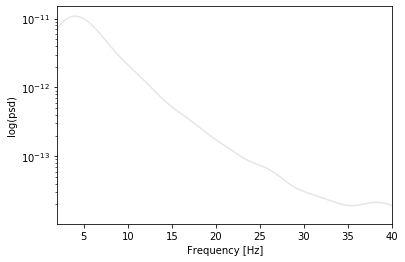

In [48]:
psd = base_psd.data_
freqs = base_psd.freqs_

plt.figure()
plt.semilogy(freqs, np.mean(psd, axis=0).T, alpha=0.1, color='black')
plt.xlim(2, 40)
plt.ylabel('log(psd)')
plt.xlabel('Frequency [Hz]')

In [53]:
picks = mne.io.pick.pick_types(epochs.info, meg=True, eeg=True)
epochs.info

<Info | 8 non-empty values
 bads: []
 ch_names: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, ...
 chs: 185 EEG
 custom_ref_applied: False
 dig: 185 items (185 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 185
 projs: []
 sfreq: 500.0 Hz
>

In [62]:
picks = mne.io.pick.pick_types(epochs.info, meg=True, eeg=True)
data = epochs.get_data()[:, picks, ...]
n_epochs = len(data)
n_epochs

18

In [13]:
import os.path as op
data_path = mne.datasets.sample.data_path()
fname = op.join(data_path, 'MEG', 'sample', 'sample_audvis_raw.fif')
raw = mne.io.read_raw_fif(fname,preload=True)
raw.set_eeg_reference()  # set EEG average reference

Opening raw data file /home/tvanasse/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Created an SSP operator (subspace dimension = 3)


<Raw | sample_audvis_raw.fif, 376 x 166800 (277.7 s), ~481.8 MB, data loaded>

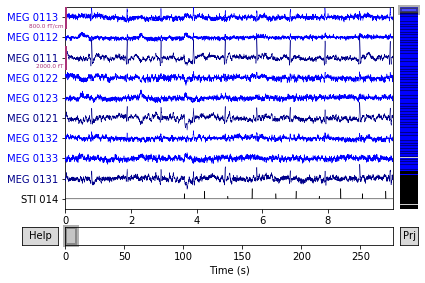

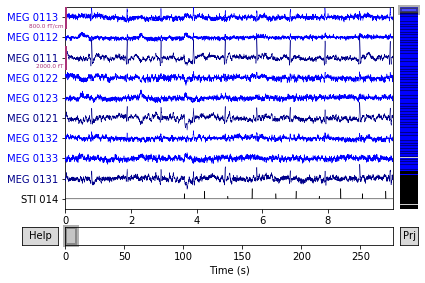

In [14]:
order = np.arange(raw.info['nchan'])
order[9] = 312  # We exchange the plotting order of two channels
order[312] = 9  # to show the trigger channel as the 10th channel.
raw.plot(n_channels=10, order=order, block=True)

In [15]:
events = mne.find_events(raw)
print('Found %s events, first five:' % len(events))
print(events[:5])

320 events found
Event IDs: [ 1  2  3  4  5 32]
Found 320 events, first five:
[[27977     0     2]
 [28345     0     3]
 [28771     0     1]
 [29219     0     4]
 [29652     0     2]]


In [8]:
# # should be 976 samples * 2 time ranges * 3 freq ranges = 5856
# import h5py

# f = h5py.File(data_folder + 'mtspecrogram.mat','r')
# list(f.keys())
# struArray = f['tf_output']
# # f[struArray['freqrange'][5855,0]].value 

In [9]:
# nrem_dataframe["TF"] = np.array(0).astype('object') #create object for 


# # get spectral exponents & set timerange (1 or 2 minutes before awakening)
# for i in range(0,len(nrem_dataframe)):
#     print(i)
    
#     nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == f[struArray['file'][i, 0]].value.tobytes()[::2].decode()].index.values),"TF"] = np.squeeze(f[struArray['tf'][i,0]].value).tolist()
# #     nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == f[struArray['path'][i, 0]].value.tobytes()[::2].decode()].index.values),"OBS_1-20"] = np.squeeze(f[struArray['obs_freq_avg'][i,0]].value).tolist()
# #     nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == f[struArray['path'][i, 0]].value.tobytes()[::2].decode()].index.values),"OBS_1-20_ALL"] = np.squeeze(f[struArray['obs_freq_all'][i,0]].value).tolist()
# #     nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == f[struArray['path'][i, 0]].value.tobytes()[::2].decode()].index.values),"FREQ_1-20"] = np.squeeze(f[struArray['freqbins'][i,0]].value).tolist()


0
1
2
3
4


/home/tvanasse/miniconda/envs/nsddata/lib/python3.7/site-packages/ipykernel_launcher.py:8: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  


5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279


In [10]:
# nrem_dataframe["SPECEXP_1-20_ALL"] = np.array(0).astype('object') #create object for 
# nrem_dataframe["OBS_1-20"] = np.array(0).astype('object') #create object for 
# nrem_dataframe["OBS_1-20_ALL"] = np.array(0).astype('object') #create object for 
# nrem_dataframe["FREQ_1-20"] = np.array(0).astype('object') #create object for

# nrem_dataframe["SPECEXP_20-40_ALL"] = np.array(0).astype('object') #create object for 
# nrem_dataframe["OBS_20-40"] = np.array(0).astype('object') #create object for 
# nrem_dataframe["OBS_20-40_ALL"] = np.array(0).astype('object') #create object for 
# nrem_dataframe["FREQ_20-40"] = np.array(0).astype('object') #create object for 

# nrem_dataframe["SPECEXP_1-40_ALL"] = np.array(0).astype('object') #create object for 
# nrem_dataframe["OBS_1-40"] = np.array(0).astype('object') #create object for 
# nrem_dataframe["OBS_1-40_ALL"] = np.array(0).astype('object') #create object for 
# nrem_dataframe["FREQ_1-40"] = np.array(0).astype('object') #create object for 

# # get spectral exponents & set timerange (1 or 2 minutes before awakening)
# timerange = 1 # minutes before awakening
# for i in range(0,mat_contents['output']['intSlo0'].shape[1]):
    
#     if (str(np.squeeze(mat_contents['output']['freqrange'][0][i])) == "[ 1 20]") & (mat_contents['output']['timerange'][0][i] == timerange):
#         nrem_dataframe.loc[nrem_dataframe[nrem_dataframe["PATH"] == mat_contents['output']['path'][0][i][0][0][0]].index.values,"SPECEXP_1-20"] = np.squeeze(mat_contents['output']['meanspectralexp'][0][i])
#         nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == mat_contents['output']['path'][0][i][0][0][0]].index.values),"SPECEXP_1-20_ALL"] = np.squeeze(mat_contents['output']['spectralexp_all'][0][i]).tolist()
#         nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == mat_contents['output']['path'][0][i][0][0][0]].index.values),"OBS_1-20"]= np.squeeze(mat_contents['output']['obs_freq_avg'][0][i]).tolist()
#         nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == mat_contents['output']['path'][0][i][0][0][0]].index.values),"OBS_1-20_ALL"]= np.squeeze(mat_contents['output']['obs_freq_all'][0][i]).tolist()
#         nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == mat_contents['output']['path'][0][i][0][0][0]].index.values),"FREQ_1-20"] = np.squeeze(mat_contents['output']['Pows'][0][i]['frex'][0][0][0]).tolist()
    
#     elif (str(np.squeeze(mat_contents['output']['freqrange'][0][i])) == "[20 40]") & (mat_contents['output']['timerange'][0][i] == timerange):
#         nrem_dataframe.loc[nrem_dataframe[nrem_dataframe["PATH"] == mat_contents['output']['path'][0][i][0][0][0]].index.values,"SPECEXP_20-40"] = np.squeeze(mat_contents['output']['meanspectralexp'][0][i])
#         nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == mat_contents['output']['path'][0][i][0][0][0]].index.values),"SPECEXP_20-40_ALL"] = np.squeeze(mat_contents['output']['spectralexp_all'][0][i]).tolist()
#         nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == mat_contents['output']['path'][0][i][0][0][0]].index.values),"OBS_20-40"] = np.squeeze(mat_contents['output']['obs_freq_avg'][0][i]).tolist()
#         nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == mat_contents['output']['path'][0][i][0][0][0]].index.values),"OBS_20-40_ALL"]= np.squeeze(mat_contents['output']['obs_freq_all'][0][i]).tolist()
#         nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == mat_contents['output']['path'][0][i][0][0][0]].index.values),"FREQ_20-40"] = np.squeeze(mat_contents['output']['Pows'][0][i]['frex'][0][0][0]).tolist()
    
#     elif (str(np.squeeze(mat_contents['output']['freqrange'][0][i])) == "[ 1 40]") & (mat_contents['output']['timerange'][0][i] == timerange):
#         nrem_dataframe.loc[nrem_dataframe[nrem_dataframe["PATH"] == mat_contents['output']['path'][0][i][0][0][0]].index.values,"SPECEXP_1-40"] = np.squeeze(mat_contents['output']['meanspectralexp'][0][i])
#         nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == mat_contents['output']['path'][0][i][0][0][0]].index.values),"SPECEXP_1-40_ALL"] = np.squeeze(mat_contents['output']['spectralexp_all'][0][i]).tolist()
#         nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == mat_contents['output']['path'][0][i][0][0][0]].index.values),"OBS_1-40"] = np.squeeze(mat_contents['output']['obs_freq_avg'][0][i]).tolist()
#         nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == mat_contents['output']['path'][0][i][0][0][0]].index.values),"OBS_1-40_ALL"]= np.squeeze(mat_contents['output']['obs_freq_all'][0][i]).tolist()
#         nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == mat_contents['output']['path'][0][i][0][0][0]].index.values),"FREQ_1-40"] = np.squeeze(mat_contents['output']['Pows'][0][i]['frex'][0][0][0]).tolist()
    

### Remove held out data (and data where scoring match is flawed)

In [30]:
print(len(nrem_dataframe))
nrem_dataframe = nrem_dataframe[(nrem_dataframe["HOLD_OUT"] == False) &
#                                 (nrem_dataframe["scoring_match"] == 1) &
                                (nrem_dataframe["Q1Experience"] != "Something")].copy()

nrem_dataframe = nrem_dataframe.reset_index(drop=True)

nrem_dataframe["REPORT_BINARY"] = 0
nrem_dataframe.loc[nrem_dataframe[(nrem_dataframe["Q1Experience"] != "NoReport")].index,"REPORT_BINARY"] = 1

nrem_dataframe

799


,DIFF_FROM_EVENT_SECONDS,DIN_EVENTS_WITHIN_TWO_MINUTES,Date,Date_Time,ENTRY_MATCHED_AWAKENING_NO,FILE_NOT_FOUND,HOLD_OUT,ID,Int,MFF_FILE_HAS_NO_EVENTS_TO_IMPORT,...,SES_PATH,Stage,Time,Visit,WAKE,PSDS_30SEC_1TO50HZ,SHORT_PATH,PSDS_AWAKENING_MEDIAN,PSDS_ALL_MEDIAN,REPORT_BINARY
0,38.636,1,NaN,11/19/0014 05:08,7.0,NaN,False,2000,RA,NaN,...,/Volumes/NCCAM/NCCAM/NCCAM3/Organize/NCCAM3_Wo...,2.0,5:08 AM,1,1.0,"[[4.157525160316343e-12, 3.961678073431068e-12...",sub-2000/eeg/ses-1/awakening-7-cleaned2_nrem.set,"[[3.94622288367296e-12, 2.8152663552364603e-12...","[[5.6211870254326244e-12, 3.893995701038784e-1...",1
1,1.118,2,NaN,11/19/0014 03:15,4.0,NaN,False,2000,RA,NaN,...,/Volumes/NCCAM/NCCAM/NCCAM3/Organize/NCCAM3_Wo...,2.0,3:15 AM,1,1.0,"[[2.3590691632393638e-11, 1.1862250418351975e-...",sub-2000/eeg/ses-1/awakening-4-cleaned2_nrem.set,"[[2.722783547185732e-11, 1.3110702015600612e-1...","[[5.6211870254326244e-12, 3.893995701038784e-1...",0
2,66.265,1,NaN,11/19/0014 01:38,2.0,NaN,False,2000,RA,NaN,...,/Volumes/NCCAM/NCCAM/NCCAM3/Organize/NCCAM3_Wo...,2.0,1:38 AM,1,1.0,"[[3.829284667247457e-12, 1.856124846496309e-12...",sub-2000/eeg/ses-1/awakening-2-cleaned2_nrem.set,"[[9.979956272932732e-12, 6.531411479806025e-12...","[[5.6211870254326244e-12, 3.893995701038784e-1...",1
3,38.338,1,NaN,11/19/0014 06:07,9.0,NaN,False,2000,RA,NaN,...,/Volumes/NCCAM/NCCAM/NCCAM3/Organize/NCCAM3_Wo...,NaN,6:07 AM,1,1.0,"[[2.5829013191563775e-12, 2.2472387064992252e-...",sub-2000/eeg/ses-1/awakening-9-cleaned2_nrem.set,"[[3.011010076476022e-12, 1.8084457356333955e-1...","[[5.6211870254326244e-12, 3.893995701038784e-1...",1
4,75.592,2,NaN,11/19/0014 03:42,5.0,NaN,False,2000,RA,NaN,...,/Volumes/NCCAM/NCCAM/NCCAM3/Organize/NCCAM3_Wo...,2.0,3:42 AM,1,1.0,"[[4.16014773751994e-12, 2.6231733950944784e-12...",sub-2000/eeg/ses-1/awakening-5-cleaned2_nrem.set,"[[7.622014745950731e-12, 5.024263059378192e-12...","[[5.6211870254326244e-12, 3.893995701038784e-1...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,27.467,1,NaN,06/02/0017 02:52,3.0,NaN,False,2144,AMV,NaN,...,/Volumes/NCCAM/NCCAM/NCCAM3/Organize/NCCAM3_Wo...,2.0,2:52 AM,2,0.0,"[[6.0752004937004955e-12, 2.248111897094927e-1...",sub-2144/eeg/ses-2/awakening-3-cleaned2_nrem.set,"[[4.2478747308513965e-12, 3.2922190032171967e-...","[[9.327738557071441e-12, 6.953632991110563e-12...",1
428,21.281,1,NaN,06/02/0017 04:01,4.0,NaN,False,2144,AMV,NaN,...,/Volumes/NCCAM/NCCAM/NCCAM3/Organize/NCCAM3_Wo...,2.0,4:01 AM,2,0.0,"[[1.0467478714258402e-11, 4.186579263811524e-1...",sub-2144/eeg/ses-2/awakening-4-cleaned2_nrem.set,"[[9.814497458944168e-12, 7.2058940453534535e-1...","[[9.327738557071441e-12, 6.953632991110563e-12...",1
429,11.882,1,NaN,06/02/0017 00:50,1.0,NaN,False,2144,AMV,NaN,...,/Volumes/NCCAM/NCCAM/NCCAM3/Organize/NCCAM3_Wo...,2.0,12:50 AM,2,0.0,"[[1.6940874350383767e-11, 8.51070916469458e-12...",sub-2144/eeg/ses-2/awakening-1-cleaned2_nrem.set,"[[1.2382905095603391e-11, 9.669311063129302e-1...","[[9.327738557071441e-12, 6.953632991110563e-12...",0
430,28.385,1,NaN,03/15/0017 02:17,3.0,NaN,False,2144,AMV,NaN,...,/Volumes/NCCAM/NCCAM/NCCAM3/Organize/NCCAM3_Wo...,2.0,2:17 AM,1,1.0,"[[2.4968387345535383e-11, 1.525115428441842e-1...",sub-2144/eeg/ses-1/awakening-3-cleaned2_nrem.set,"[[2.2537863523956997e-11, 9.070315211527407e-1...","[[7.931129282461791e-12, 5.727133500703439e-12...",1


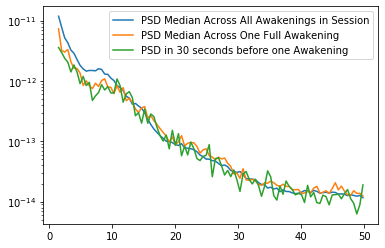

In [39]:
plt.plot(freqs, np.array(nrem_dataframe['PSDS_ALL_MEDIAN'][50])[0,:],
         label="PSD Median Across All Awakenings in Session")
plt.plot(freqs, np.array(nrem_dataframe['PSDS_AWAKENING_MEDIAN'][50])[0,:], 
         label="PSD Median Across One Full Awakening")
plt.plot(freqs, np.array(nrem_dataframe['PSDS_30SEC_1TO50HZ'][50])[0,:], 
         label="PSD in 30 seconds before one Awakening")
plt.yscale('log')
plt.legend()
plt.show()

# plt.plot(features[35])

### Spectral Exponent (1-20) x 185 channels as feature matrix

In [120]:
# (n_samples, n_features) 
features = np.vstack(nrem_dataframe["SPECEXP_1-20_ALL"].values)
print("features: " + str(features.shape))

y = nrem_dataframe["REPORT_BINARY"].values
print("y: " + str(y.shape))

groups = nrem_dataframe["ID"].values
print("groups: " + str(groups.shape))

features: (664, 185)
y: (664,)
groups: (664,)


In [121]:
from sklearn import preprocessing
features = preprocessing.scale(features)

In [122]:
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import cross_validate
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier


n_splits = 3
n_jobs = 20

# create group k fold with n splits
gkf = GroupKFold(n_splits=n_splits)
print(gkf)

clf = svm.SVC(kernel='linear',
              class_weight='balanced'
             )

# clf = RandomForestClassifier(random_state=101)

cv_object = cross_validate(clf, 
                           X=features, 
                           y=y,
                           cv=gkf,
                           n_jobs=n_jobs,
                           groups=groups,
                           scoring='balanced_accuracy')

print(cv_object)
print("Mean Bal. Acc: " + str(np.mean(cv_object['test_score'])))

GroupKFold(n_splits=3)
{'fit_time': array([0.1186409 , 0.13041544, 0.14947295]), 'score_time': array([0.01678157, 0.01781774, 0.01730227]), 'test_score': array([0.46506211, 0.47634409, 0.50044785])}
Mean Bal. Acc: 0.48061801604707294


Reading /data/tvanasse/nccam3/sub-2000/eeg/ses-1/awakening-7-cleaned2_nrem.fdt


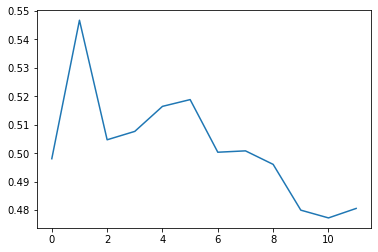

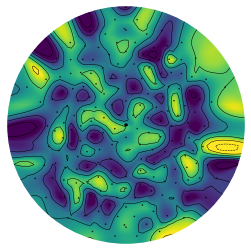

(<matplotlib.image.AxesImage at 0x7ef890158290>,
 <matplotlib.contour.QuadContourSet at 0x7ef890158690>)

In [126]:
# rank features
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from matplotlib import cm, colors, colorbar

import mne
raw = mne.io.read_raw_eeglab(data_folder + 'sub-2000/eeg/ses-1/awakening-7-cleaned2_nrem.set')

from sklearn.feature_selection import RFECV

selector = RFECV(clf, 
                 step=features.shape[1]/10, 
                 cv=gkf, 
                 scoring='balanced_accuracy', 
                 verbose=0, 
                 n_jobs=n_jobs)
selector.fit(features, y, groups=groups)

plt.plot(selector.grid_scores_)
plt.show()

# Plot the topography of ranking
mne.viz.plot_topomap(selector.ranking_, 
                     raw.info, 
#                      vmin=1, 
#                      vmax=150, 
                     cmap=cm.viridis_r,)

In [127]:
# selector.estimator_.feature_importances_

In [128]:
print("Fit to top features: " + str(features[:,selector.ranking_ == 1].shape))

n_splits = 5

# create group k fold with n splits
gkf = GroupKFold(n_splits=n_splits)
print(gkf)

clf = svm.SVC(kernel='linear',
              class_weight='balanced'
             )

cv_object = cross_validate(clf, 
                           X=features[:,selector.ranking_ == 1], 
                           y=y,
                           cv=gkf,
                           n_jobs=n_jobs,
                           groups=groups,
                           scoring='balanced_accuracy')

print(cv_object)
print("Mean Bal. Acc: " + str(np.mean(cv_object['test_score'])))

Fit to top features: (664, 5)
GroupKFold(n_splits=5)
{'fit_time': array([0.00771022, 0.00702167, 0.0068984 , 0.00808501, 0.00765657]), 'score_time': array([0.0022788 , 0.00233436, 0.00214887, 0.00230265, 0.00228238]), 'test_score': array([0.55992844, 0.41995991, 0.61564626, 0.53271693, 0.53503811])}
Mean Bal. Acc: 0.5326579299197418


In [130]:
null_hist = []
n_splits = 3
n_jobs = 5

for i in range(0,50):
    
    y = nrem_dataframe["REPORT_BINARY"].values
    random.shuffle(y)
    
    # create group k fold with n splits
    gkf = GroupKFold(n_splits=n_splits)

    clf = svm.SVC(kernel='linear',
                  class_weight='balanced'
                 )

    selector = RFECV(clf, 
                     step=features.shape[1]/10, 
                     cv=gkf, 
                     scoring='balanced_accuracy', 
                     verbose=0, 
                     n_jobs=n_jobs)

    selector = selector.fit(features, 
                            y, 
                            groups=groups)
    
#     plt.plot(selector.grid_scores_)
#     plt.show()

    cv_object = cross_validate(clf, 
                               X=features[:,selector.ranking_ == 1], 
                               y=y,
                               cv=gkf,
                               n_jobs=n_jobs,
                               groups=groups,
                               scoring='balanced_accuracy')

    print("Mean Bal. Acc: " + str(np.mean(cv_object['test_score'])))
    null_hist.append(np.mean(cv_object['test_score']))

Mean Bal. Acc: 0.49827601769737323
Mean Bal. Acc: 0.47999132048035026
Mean Bal. Acc: 0.5819884401188408
Mean Bal. Acc: 0.5309506357917333
Mean Bal. Acc: 0.5981304001207545
Mean Bal. Acc: 0.5289316149186006
Mean Bal. Acc: 0.5012413344043001
Mean Bal. Acc: 0.5017013717198563


KeyboardInterrupt: 

### Classic frequency band peaks of 185 channels

In [31]:
# get band peaks
features = []
for i in range(0,len(nrem_dataframe['PSDS_60SEC_1TO50HZ'].values)):
    print(i)
#     features.append(np.hstack(nrem_dataframe["OBS_1-40_ALL"].values[i]))
    y = []
        
    for f in [[0,4],[4,8],[8,13],[13,30],[30,50]]:
        a = np.where(freqs >= f[0])
        b = np.where(freqs <= f[1])
        c = np.intersect1d(a,b)
        y.append(np.average(np.array(nrem_dataframe['PSDS_60SEC_1TO50HZ'][i])[:,c,:], axis=(1,2)))  
            
    features.append(np.array(y).flatten('F'))
    
features = np.array(features)

print("features: " + str(features.shape))

KeyError: 'PSDS_60SEC_1TO50HZ'

In [29]:
from sklearn import preprocessing
features = preprocessing.scale(features)

y = nrem_dataframe["REPORT_BINARY"].values
print("y: " + str(y.shape))

groups = nrem_dataframe["ID"].values
print("groups: " + str(groups.shape))

print("features: " + str(features.shape))

y: (427,)
groups: (427,)
features: (427, 925)


In [31]:
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import cross_validate
from sklearn import svm 


n_splits = 3
n_jobs = 1

# create group k fold with n splits
gkf = GroupKFold(n_splits=n_splits)
print(gkf)

clf = svm.SVC(kernel='linear',
              class_weight='balanced'
             )

cv_object = cross_validate(clf, 
                           X=features, 
                           y=y,
                           cv=gkf,
                           n_jobs=n_jobs,
                           groups=groups,
                           scoring='balanced_accuracy')

cv_object

GroupKFold(n_splits=3)


{'fit_time': array([0.1784296 , 0.1256783 , 0.15950823]),
 'score_time': array([0.02586031, 0.02521658, 0.02671099]),
 'test_score': array([0.47691706, 0.45774648, 0.52816901])}

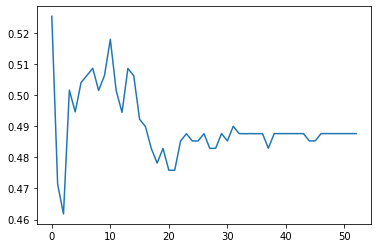

In [32]:
# rank features
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from matplotlib import cm, colors, colorbar

from sklearn.feature_selection import RFECV

selector = RFECV(clf, 
                 step=features.shape[1]/50, 
                 cv=gkf, 
                 scoring='balanced_accuracy', 
                 verbose=0, 
                 n_jobs=1)
selector = selector.fit(features, 
                        y, 
                        groups=groups)

plt.plot(selector.grid_scores_)
plt.show()

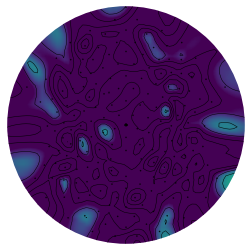

(<matplotlib.image.AxesImage at 0x7fc850535890>,
 <matplotlib.contour.QuadContourSet at 0x7fc850535190>)

In [34]:
channel_sum_ranking = []
for i in range(0,925,5):
    channel_sum_ranking.append(np.sum(selector.ranking_[i:i+5]))
    
# Plot the topography of ranking
mne.viz.plot_topomap(np.array(channel_sum_ranking), 
                     raw.info, 
                     vmin=1, 
                     vmax=100, 
                     cmap=cm.viridis_r,)

In [35]:
# create group k fold with n splits
gkf = GroupKFold(n_splits=n_splits)
print(gkf)

clf = svm.SVC(kernel='linear',
              class_weight='balanced'
             )

cv_object = cross_validate(clf, 
                           X=features[:,selector.ranking_ == 1], 
                           y=y,
                           cv=gkf,
                           n_jobs=n_jobs,
                           groups=groups,
                           scoring='balanced_accuracy')

print(cv_object)
print("Mean Bal. Acc: " + str(np.mean(cv_object['test_score'])))

GroupKFold(n_splits=3)
{'fit_time': array([0.00173569, 0.00160122, 0.00137067]), 'score_time': array([0.00119591, 0.00071311, 0.00066423]), 'test_score': array([0.49227308, 0.52112676, 0.47183099])}
Mean Bal. Acc: 0.4950769431403234


In [36]:
feat_cols = [ 'pixel'+str(i) for i in range(features.shape[1]) ]
df = pd.DataFrame(features,columns=feat_cols)
df['label'] = nrem_dataframe["ID"].values
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (427, 926)


In [39]:
import time
from sklearn.manifold import TSNE
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(features)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 427 samples in 0.005s...
[t-SNE] Computed neighbors for 427 samples in 0.246s...
[t-SNE] Computed conditional probabilities for sample 427 / 427
[t-SNE] Mean sigma: 6.744915
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.117790
[t-SNE] KL divergence after 300 iterations: 0.831112
t-SNE done! Time elapsed: 0.9805333614349365 seconds


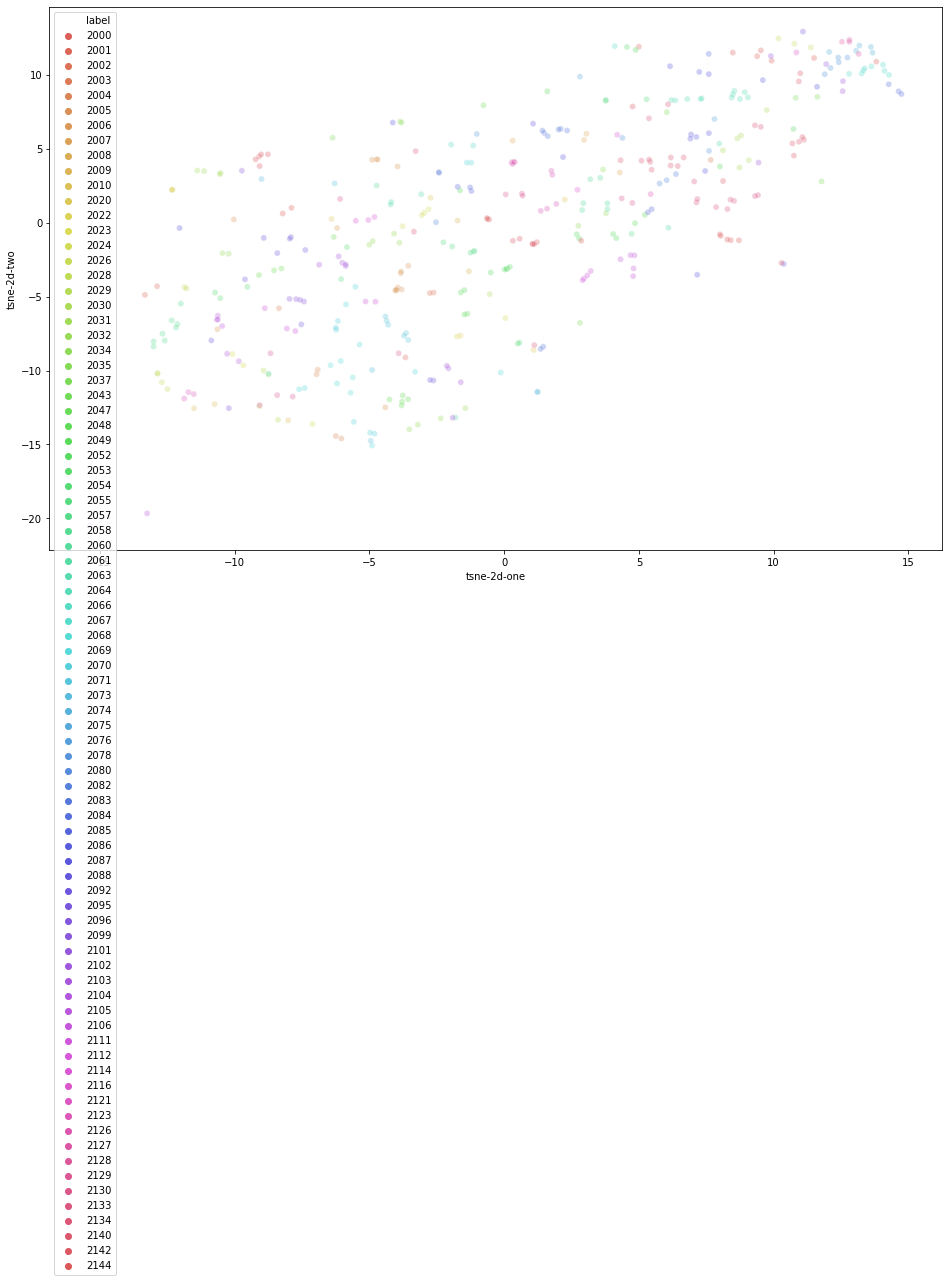

In [46]:
import seaborn as sns

df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", len(pd.unique(df["label"]))),
#     palette=sns.color_palette("Spectral", as_cmap=True),
    data=df,
    legend="full",
    alpha=0.3
)

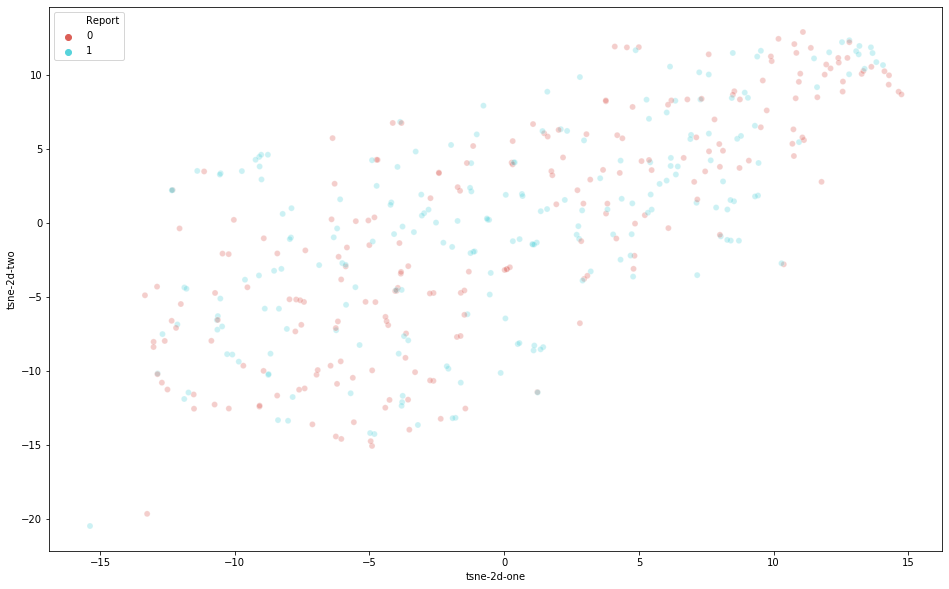

In [48]:
df['Report'] = nrem_dataframe["REPORT_BINARY"].values

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Report",
    palette=sns.color_palette("hls", 2),
#     palette=sns.color_palette("Spectral", as_cmap=True),
    data=df,
    legend="full",
    alpha=0.3
)

### Subject-Specific Normalized Frequency Bands
binarize according to median of data

In [32]:
# get band peaks
features = []
for i in range(0,len(nrem_dataframe['PSDS_30SEC_1TO50HZ'].values)):
    print(i)
#     features.append(np.hstack(nrem_dataframe["OBS_1-40_ALL"].values[i]))
    y = []
        
    for f in [[0,4],[4,8],[8,13],[13,30],[30,50]]:
        
        a = np.where(freqs >= f[0])
        b = np.where(freqs <= f[1])
        c = np.intersect1d(a,b)
        
        binar = np.average(np.array(nrem_dataframe['PSDS_30SEC_1TO50HZ'][i])[:,c], axis=1) > np.average(np.array(nrem_dataframe['PSDS_AWAKENING_MEDIAN'][i])[:,c],axis=1)
        binar = 1*binar # boolean to integer
        y.append(binar)
        
        #         y.append(np.average(np.array(nrem_dataframe['PSDS_30SEC_1TO50HZ'][i])[:,c,:], axis=(1,2)) -
#                             np.average(np.array(nrem_dataframe['PSDS_ALL_MEDIAN'][i])[:,c],axis=1))
        
#         mne.viz.plot_topomap(y[-1], 
#                      pos=raw.info, 
#                      outlines='skirt',
# #                      mask=sig_mask,
#                      vmin=-50, 
#                      vmax=50, 
#                      show=True,
# #                      axes=axs[row,j],
# #                      cmap=cmap,
#                      res=150,
# #                              cbar_fmt='-%0.1f',
#                      )
                 
            #                  np.average(np.array(avg_median)[:,:,c], axis=(0,2)))  
            
    features.append(np.array(y).flatten('F'))
    
features = np.array(features)

print("features: " + str(features.shape))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

Nights with all the same value: 0
1/0 Ratio: 0.5716066066066066


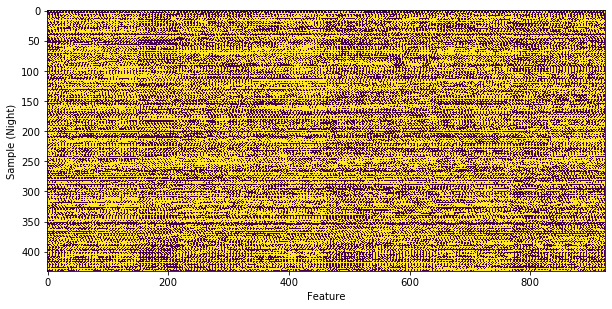

In [33]:
fig, axes = plt.subplots(figsize=(10,15))
plt.imshow(features)
plt.xlabel('Feature')
plt.ylabel('Sample (Night)')
# plt.colorbar()
# plt.show()

all_same = []
for i in range(0,features.shape[0]):
    # Check all values in an array are equal to its first element
    arr = features[i,:]
    result = np.all(arr == arr[0])
    if result == 1:
        all_same.append(i)

print("Nights with all the same value: " + str(len(all_same)))
print("1/0 Ratio: " + str(np.count_nonzero(features)/np.size(features)))

In [34]:
# from sklearn import preprocessing
# features = preprocessing.scale(features)

y = nrem_dataframe["REPORT_BINARY"].copy().values
print("y: " + str(y.shape))

groups = nrem_dataframe["ID"].values
print("groups: " + str(groups.shape))

print("features: " + str(features.shape))

y: (432,)
groups: (432,)
features: (432, 925)


In [36]:
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import cross_validate
from sklearn import svm 


n_splits = 3
n_jobs = 1

# create group k fold with n splits
gkf = GroupKFold(n_splits=n_splits)
print(gkf)

clf = svm.SVC(kernel='linear',
              class_weight='balanced'
             )

# nonlinear svm model 
# clf = svm.NuSVC(gamma='auto')

cv_object = cross_validate(clf, 
                           X=features, 
                           y=y,
                           cv=gkf,
                           n_jobs=n_jobs,
                           groups=groups,
                           scoring='balanced_accuracy')

print(cv_object)
print("Mean: " + str(np.mean(cv_object['test_score'])))

GroupKFold(n_splits=3)
{'fit_time': array([0.0929265 , 0.08931351, 0.08556986]), 'score_time': array([0.03960371, 0.03507996, 0.03602028]), 'test_score': array([0.46904025, 0.48426573, 0.58376812])}
Mean: 0.5123580326285939


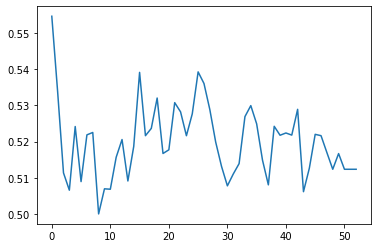

In [37]:
# rank features
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from matplotlib import cm, colors, colorbar

from sklearn.feature_selection import RFECV

selector = RFECV(clf, 
                 step=features.shape[1]/50, 
                 cv=gkf, 
                 scoring='balanced_accuracy', 
                 verbose=0, 
                 n_jobs=1)

selector = selector.fit(features, 
                        y, 
                        groups=groups)

plt.plot(selector.grid_scores_)
plt.show()

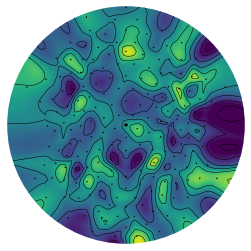

(<matplotlib.image.AxesImage at 0x7f9ea3733390>,
 <matplotlib.contour.QuadContourSet at 0x7f9ea3733650>)

In [19]:
channel_sum_ranking = []
for i in range(0,925,5):
    channel_sum_ranking.append(np.sum(selector.ranking_[i:i+5]))
    
# Plot the topography of ranking
mne.viz.plot_topomap(np.array(channel_sum_ranking), 
                     raw.info, 
#                      vmin=1, 
#                      vmax=100, 
                     cmap=cm.viridis_r,)

In [20]:
print("Fit to top features: " + str(features[:,selector.ranking_ == 1].shape))

n_splits = 5

# create group k fold with n splits
gkf = GroupKFold(n_splits=n_splits)
print(gkf)

clf = svm.SVC(kernel='linear',
              class_weight='balanced'
             )

cv_object = cross_validate(clf, 
                           X=features[:,selector.ranking_ == 1], 
                           y=y,
                           cv=gkf,
                           n_jobs=n_jobs,
                           groups=groups,
                           scoring='balanced_accuracy')

print(cv_object)
print("Mean Bal. Acc: " + str(np.mean(cv_object['test_score'])))

Fit to top features: (427, 169)
GroupKFold(n_splits=5)
{'fit_time': array([0.02733922, 0.03248   , 0.02828932, 0.02322721, 0.0219171 ]), 'score_time': array([0.0027163 , 0.00258565, 0.00248981, 0.0024085 , 0.00234914]), 'test_score': array([1.        , 0.98809524, 0.96565315, 0.95523649, 0.92142857])}
Mean Bal. Acc: 0.9660826898326897


Size of the dataframe: (427, 926)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 427 samples in 0.004s...
[t-SNE] Computed neighbors for 427 samples in 0.250s...
[t-SNE] Computed conditional probabilities for sample 427 / 427
[t-SNE] Mean sigma: 4.486341
[t-SNE] KL divergence after 250 iterations with early exaggeration: 93.741302
[t-SNE] KL divergence after 300 iterations: 1.213577
t-SNE done! Time elapsed: 0.9930343627929688 seconds


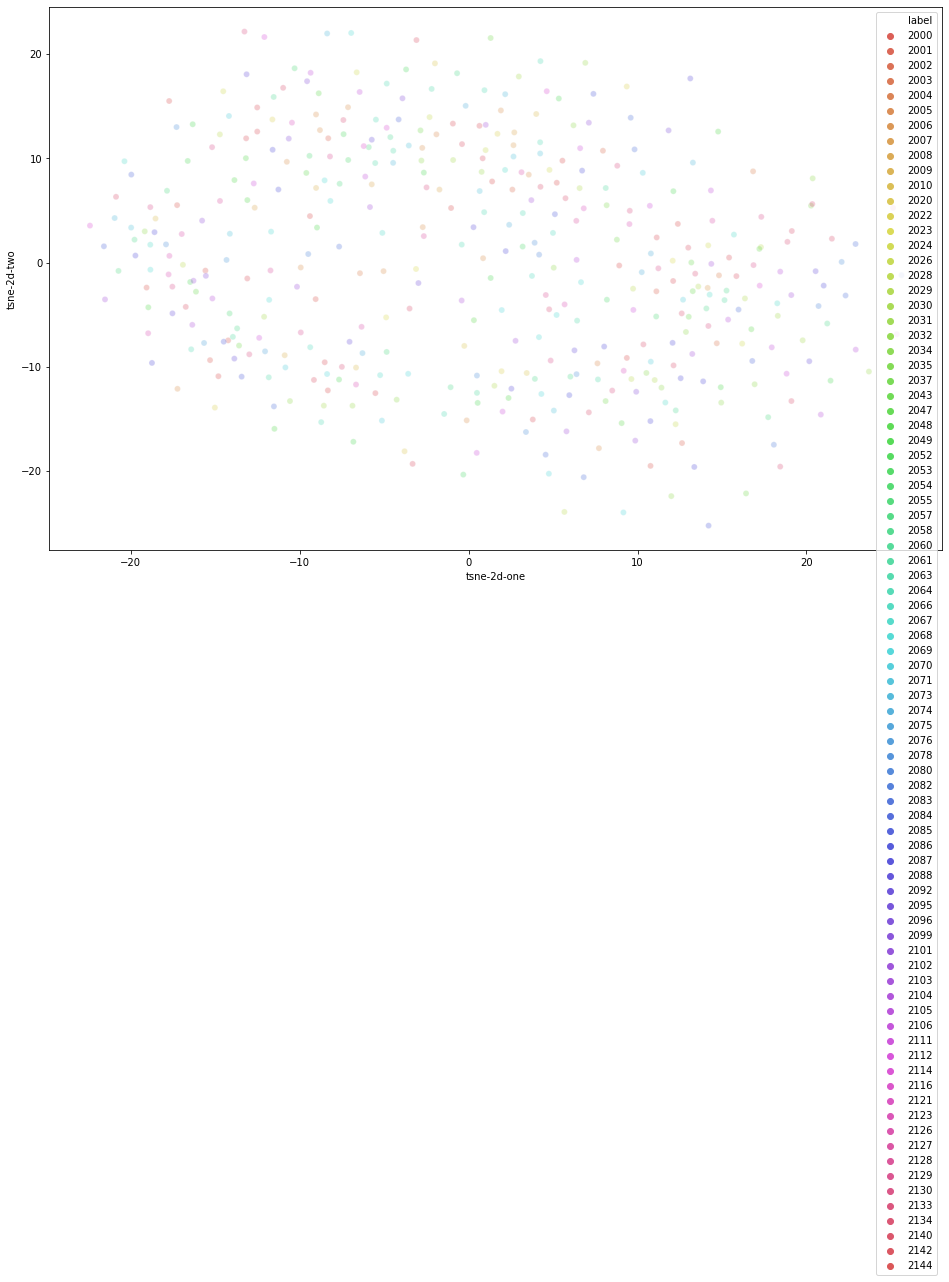

In [21]:
feat_cols = [ 'pixel'+str(i) for i in range(features.shape[1]) ]
df = pd.DataFrame(features,columns=feat_cols)
df['label'] = nrem_dataframe["ID"].values
print('Size of the dataframe: {}'.format(df.shape))

import time
from sklearn.manifold import TSNE
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(features)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

import seaborn as sns

df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", len(pd.unique(df["label"]))),
#     palette=sns.color_palette("Spectral", as_cmap=True),
    data=df,
    legend="full",
    alpha=0.3
)

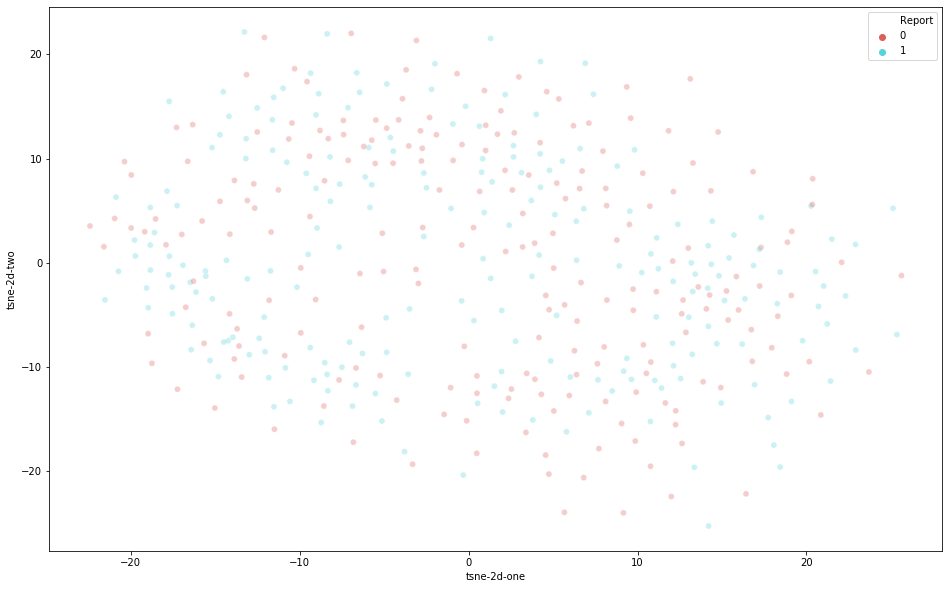

In [22]:
df['Report'] = nrem_dataframe["REPORT_BINARY"].values

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Report",
    palette=sns.color_palette("hls", 2),
#     palette=sns.color_palette("Spectral", as_cmap=True),
    data=df,
    legend="full",
    alpha=0.3
)

In [26]:
import random
null_hist = []
n_splits = 3
n_jobs = 5

for i in range(0,50):
    
#     y = nrem_dataframe["REPORT_BINARY"].values
    random.shuffle(y)
    
    # create group k fold with n splits
    gkf = GroupKFold(n_splits=n_splits)

    clf = svm.SVC(kernel='linear',
                  class_weight='balanced'
                 )

#     selector = RFECV(clf, 
#                      step=features.shape[1]/10, 
#                      cv=gkf, 
#                      scoring='balanced_accuracy', 
#                      verbose=0, 
#                      n_jobs=n_jobs)

#     selector = selector.fit(features, 
#                             y, 
#                             groups=groups)
    
# #     plt.plot(selector.grid_scores_)
# #     plt.show()

    cv_object = cross_validate(clf, 
                               X=features[:,selector.ranking_ == 1], 
                               y=y,
                               cv=gkf,
                               n_jobs=n_jobs,
                               groups=groups,
                               scoring='balanced_accuracy')

    print("Mean Bal. Acc: " + str(np.mean(cv_object['test_score'])))
    null_hist.append(np.mean(cv_object['test_score']))

Mean Bal. Acc: 0.4944079069079068
Mean Bal. Acc: 0.49960380238280294
Mean Bal. Acc: 0.4763484767114854
Mean Bal. Acc: 0.5262052403155607
Mean Bal. Acc: 0.5053758395076757
Mean Bal. Acc: 0.47143874310420814
Mean Bal. Acc: 0.5343555635809157
Mean Bal. Acc: 0.4865450433677836
Mean Bal. Acc: 0.5020104740692982
Mean Bal. Acc: 0.5499718212601166
Mean Bal. Acc: 0.4920952861986565
Mean Bal. Acc: 0.4945408213681198
Mean Bal. Acc: 0.5445837375921794
Mean Bal. Acc: 0.4980687979353551
Mean Bal. Acc: 0.5209433037707368
Mean Bal. Acc: 0.48180031149773367
Mean Bal. Acc: 0.4965663021511479
Mean Bal. Acc: 0.5048525994099496
Mean Bal. Acc: 0.49093689963255177
Mean Bal. Acc: 0.48002463645019416
Mean Bal. Acc: 0.5000822280570564
Mean Bal. Acc: 0.4758950720907243
Mean Bal. Acc: 0.4852733033933328
Mean Bal. Acc: 0.5483712914595268
Mean Bal. Acc: 0.519364192556654
Mean Bal. Acc: 0.46451401607651616
Mean Bal. Acc: 0.5003024026507336
Mean Bal. Acc: 0.5535596126956736
Mean Bal. Acc: 0.49207107736172934
Mean Bal

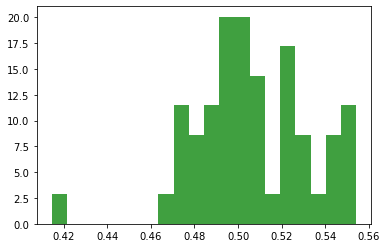

In [27]:
# the histogram of the data
n, bins, patches = plt.hist(np.array(null_hist), 20, density=True, facecolor='g', alpha=0.75)

### PSD of 185 channels--324 bins--as feature matrix

In [21]:
features = []
for i in range(0,len(nrem_dataframe["OBS_1-40_ALL"].values)):
    features.append(np.array(nrem_dataframe["OBS_1-40_ALL"].values[i]).flatten('F'))
features = np.vstack(np.array(features))

print("features: " + str(features.shape))

y = nrem_dataframe["REPORT_BINARY"].values
print("y: " + str(y.shape))

groups = nrem_dataframe["ID"].values
print("groups: " + str(groups.shape))

features: (664, 59940)
y: (664,)
groups: (664,)


In [22]:
from sklearn import preprocessing
features = preprocessing.scale(features) # standardize each feature

In [23]:
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import cross_validate
from sklearn import svm 


n_splits = 5
n_jobs = 30

# create group k fold with n splits
gkf = GroupKFold(n_splits=n_splits)
print(gkf)

clf = svm.SVC(kernel='linear',
              class_weight='balanced'
             )

cv_object = cross_validate(clf, 
                           X=features, 
                           y=y,
                           cv=gkf,
                           n_jobs=n_jobs,
                           groups=groups,
                           scoring='balanced_accuracy')

cv_object



GroupKFold(n_splits=5)


{'fit_time': array([27.99517131, 21.72810078, 24.47529507, 26.11529684, 26.874897  ]),
 'score_time': array([3.7226119 , 4.16786647, 3.68828988, 4.5199542 , 3.64097166]),
 'test_score': array([0.44693079, 0.52962206, 0.52045827, 0.43513514, 0.54831039])}

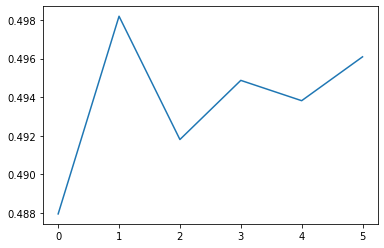

In [25]:
from sklearn.feature_selection import RFECV

selector = RFECV(clf, 
                 step=features.shape[1]/5, 
                 cv=gkf, 
                 scoring='balanced_accuracy', 
                 verbose=0, 
                 n_jobs=n_jobs)
selector = selector.fit(features, y, groups=groups)

plt.plot(selector.grid_scores_)

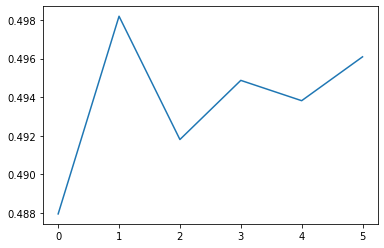

In [26]:
plt.plot(selector.grid_scores_)

In [27]:
selector.estimator_.

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
channel_sum_ranking = []
for i in range(0,59940,324):
    channel_sum_ranking.append(np.sum(selector.ranking_[i:i+324]))

In [ ]:
# Plot the topography of ranking
mne.viz.plot_topomap(np.array(channel_sum_ranking), 
                     raw.info, 
#                      vmin=1, 
#                      vmax=2, 
                     cmap=cm.viridis_r,)

In [ ]:
# create group k fold with n splits
gkf = GroupKFold(n_splits=n_splits)
print(gkf)

clf = svm.SVC(kernel='linear',
              class_weight='balanced'
             )

cv_object = cross_validate(clf, 
                           X=features[:,selector.ranking_ == 1], 
                           y=y,
                           cv=gkf,
                           n_jobs=n_jobs,
                           groups=groups,
                           scoring='balanced_accuracy')

print(cv_object)
print("Mean Bal. Acc: " + str(np.mean(cv_object['test_score'])))

### PSD of 185 channels--324 bins--as feature matrix (PCA REDUCED)

In [33]:
from sklearn.decomposition import PCA

features: (427, 18500)
y: (427,)
groups: (427,)
features (PCA reduced): (427, 25)


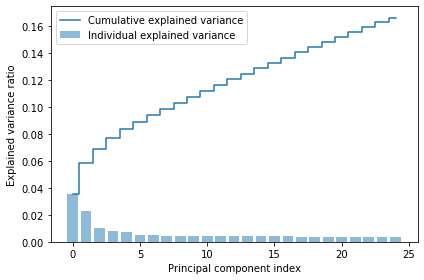

In [41]:
features = []
for i in range(0,len(nrem_dataframe)):
#     features.append(np.array(nrem_dataframe["PSDS_30SEC_1TO50HZ"].values[i]).flatten('F'))
    binar = np.array(nrem_dataframe['PSDS_30SEC_1TO50HZ'][i])[:,:] > np.array(nrem_dataframe['PSDS_AWAKENING_MEDIAN'][i])[:,:]
    binar = 1*binar # boolean to integer
#     print(binar.shape) # pre-flattening shape
    features.append(binar.flatten('F'))
features = np.vstack(np.array(features))

print("features: " + str(features.shape))

y = nrem_dataframe["REPORT_BINARY"].copy().values
print("y: " + str(y.shape))

groups = nrem_dataframe["ID"].values
print("groups: " + str(groups.shape))

pca = PCA(n_components=25)
features_r = pca.fit(features).transform(features)
print("features (PCA reduced): " + str(features_r.shape))

# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Sample (Night)')

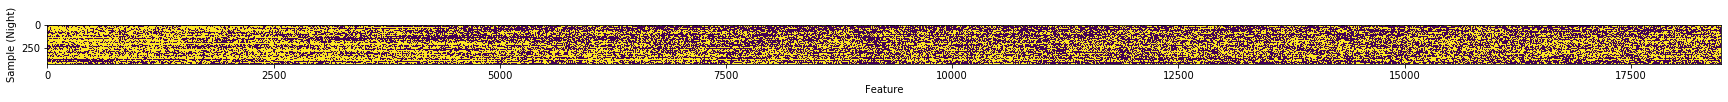

In [42]:
fig, axes = plt.subplots(figsize=(30,70))
plt.imshow(features)
plt.xlabel('Feature')
plt.ylabel('Sample (Night)')
# plt.colorbar()
# plt.show()

In [43]:
from sklearn import preprocessing
features_r = preprocessing.scale(features_r) # standardize each feature

from sklearn.model_selection import GroupKFold
from sklearn.model_selection import cross_validate
from sklearn import svm 


n_splits = 5
n_jobs = 1

# create group k fold with n splits
gkf = GroupKFold(n_splits=n_splits)
print(gkf)

clf = svm.SVC(kernel='linear',
              class_weight='balanced'
             )

# clf = svm.NuSVC(gamma='auto')

cv_object = cross_validate(clf, 
                           X=features_r, 
                           y=y,
                           cv=gkf,
                           n_jobs=n_jobs,
                           groups=groups,
                           scoring='balanced_accuracy')

print(cv_object)
print("Mean Bal. Acc: " + str(np.mean(cv_object['test_score'])))

GroupKFold(n_splits=5)
{'fit_time': array([0.0138278 , 0.0117898 , 0.01913357, 0.00978279, 0.01288176]), 'score_time': array([0.00115871, 0.00099802, 0.0009706 , 0.00095391, 0.00096273]), 'test_score': array([0.44683258, 0.44155844, 0.4901464 , 0.44115991, 0.45428571])}
Mean Bal. Acc: 0.4547966082671965


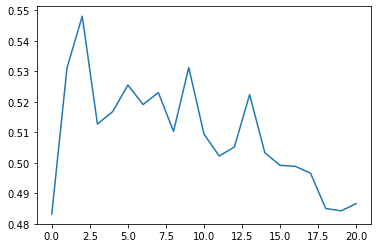

In [25]:
from sklearn.feature_selection import RFECV

selector = RFECV(clf, 
                 step=features_r.shape[1]/20, 
                 cv=gkf, 
                 scoring='balanced_accuracy', 
                 verbose=0, 
                 n_jobs=1)

selector = selector.fit(features_r, y, groups=groups)

plt.plot(selector.grid_scores_)

component weights, channel sum: 0
feature ranking: 1


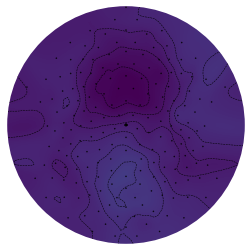

component weights, channel sum: 1
feature ranking: 7


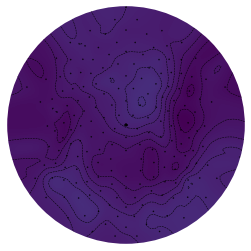

component weights, channel sum: 2
feature ranking: 10


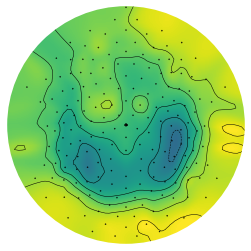

component weights, channel sum: 3
feature ranking: 8


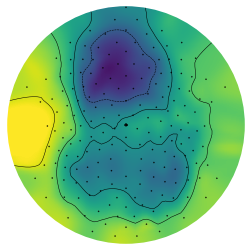

component weights, channel sum: 4
feature ranking: 17


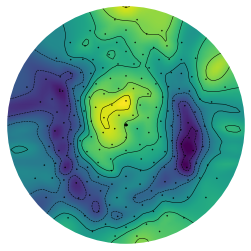

component weights, channel sum: 5
feature ranking: 18


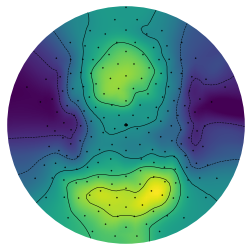

component weights, channel sum: 6
feature ranking: 9


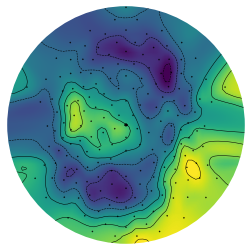

component weights, channel sum: 7
feature ranking: 11


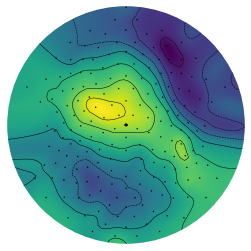

component weights, channel sum: 8
feature ranking: 3


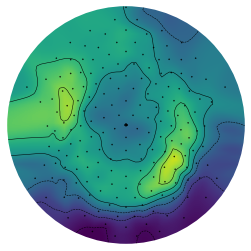

component weights, channel sum: 9
feature ranking: 1


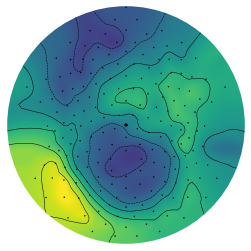

component weights, channel sum: 10
feature ranking: 2


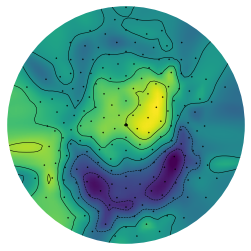

component weights, channel sum: 11
feature ranking: 14


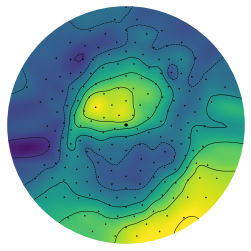

component weights, channel sum: 12
feature ranking: 2


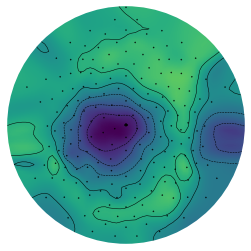

component weights, channel sum: 13
feature ranking: 7


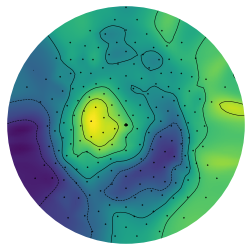

component weights, channel sum: 14
feature ranking: 3


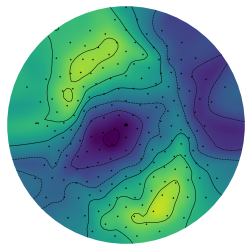

component weights, channel sum: 15
feature ranking: 11


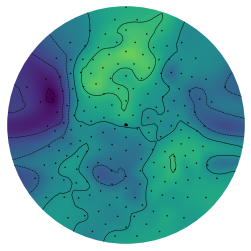

component weights, channel sum: 16
feature ranking: 17


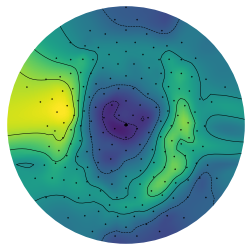

component weights, channel sum: 17
feature ranking: 13


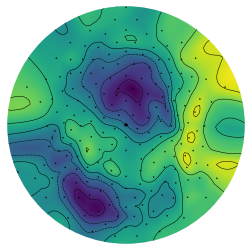

component weights, channel sum: 18
feature ranking: 16


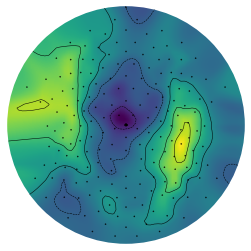

component weights, channel sum: 19
feature ranking: 9


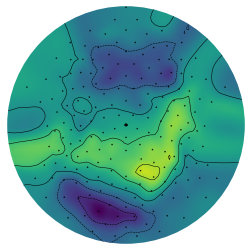

In [27]:
for comp in range(0,20):
    print("component weights, channel sum: " + str(comp))
    print("feature ranking: " + str(selector.ranking_[comp]))
    channel_sum_ranking = []
    for i in range(0,185):
#         end_shape = np.array(nrem_dataframe["TF"].values[0]).shape
        end_shape = (185, 100)
        channel_sum_ranking.append(np.sum(pca.components_[comp].reshape(end_shape, order='F')[i,:]))
#         channel_sum_ranking.append(np.sum(np.absolute(pca.components_[comp][i:i+324])))
    # Plot the topography of ranking
    mne.viz.plot_topomap(np.array(channel_sum_ranking), 
                         raw.info, 
    #                      vmin=1, 
    #                      vmax=2, 
                         cmap=cm.viridis,)
    plt.show()

In [188]:
print("Fit to top features: " + str(features_r[:,selector.ranking_ == 1].shape[1]))

# create group k fold with n splits
gkf = GroupKFold(n_splits=n_splits)
print(gkf)

clf = svm.SVC(kernel='linear',
              class_weight='balanced'
             )

cv_object = cross_validate(clf, 
                           X=features_r[:,selector.ranking_ == 1], 
                           y=y,
                           cv=gkf,
                           n_jobs=n_jobs,
                           groups=groups,
                           scoring='balanced_accuracy')

print(cv_object)
print("Mean Bal. Acc: " + str(np.mean(cv_object['test_score'])))

Fit to top features: 5
GroupKFold(n_splits=5)
{'fit_time': array([0.01006103, 0.00506902, 0.00512838, 0.00585222, 0.00512004]), 'score_time': array([0.000983  , 0.00089908, 0.00090075, 0.00086617, 0.00089216]), 'test_score': array([0.52849107, 0.51200204, 0.57746863, 0.54196302, 0.52315394])}
Mean Bal. Acc: 0.5366157410496861


### Time-Frequency as Predictors (PCA reduced)

In [18]:
from sklearn.decomposition import PCA
import random

components = 50

features = []
for i in range(0,len(nrem_dataframe["TF"].values)):
    if len(np.array(nrem_dataframe["TF"].values[i]).shape) == 4:
        features.append(np.array(nrem_dataframe["TF"].values[i])[:,:,:,0].flatten('F')) # for some reason matlab spits out 
    else:
        features.append(np.array(nrem_dataframe["TF"].values[i]).flatten('F'))
        
features = np.vstack(np.array(features))

features: (664, 370000)
y: (664,)
groups: (664,)
0
3700
features (PCA reduced): (664, 50)


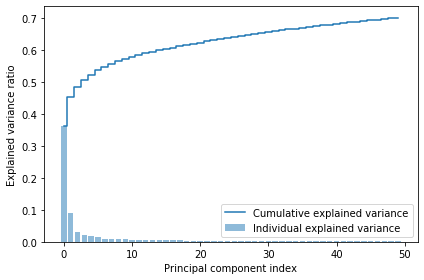

In [19]:
print("features: " + str(features.shape))
y = nrem_dataframe["REPORT_BINARY"].values

print("y: " + str(y.shape))

groups = nrem_dataframe["ID"].values
print("groups: " + str(groups.shape))

print(len(features[features == float('+inf')]))
features[features == float('+inf')] = 0
print(len(features[features == float('-inf')]))
features[features == float('-inf')] = 0

pca = PCA(n_components=components)
features_r = pca.fit(features).transform(features)

print("features (PCA reduced): " + str(features_r.shape))

# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [20]:
from sklearn import preprocessing
features_r = preprocessing.scale(features_r) # standardize each feature

In [21]:
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import cross_validate
from sklearn import svm 


n_splits = 3

n_jobs = 30

# create group k fold with n splits
gkf = GroupKFold(n_splits=n_splits)
print(gkf)

clf = svm.SVC(kernel='linear',
              class_weight='balanced'
             )

# clf = svm.NuSVC(gamma='auto')

cv_object = cross_validate(clf, 
                           X=features_r, 
                           y=y,
                           cv=gkf,
                           n_jobs=n_jobs,
                           groups=groups,
                           scoring='balanced_accuracy')

print(cv_object)
print("Mean Bal. Acc: " + str(np.mean(cv_object['test_score'])))

GroupKFold(n_splits=3)
{'fit_time': array([0.05696559, 0.04425812, 0.04876995]), 'score_time': array([0.00475264, 0.00512052, 0.00459027]), 'test_score': array([0.52729899, 0.5683272 , 0.50261525])}
Mean Bal. Acc: 0.5327471441153844


In [40]:
for i in range(0,10):
    random.shuffle(y)
    cv_object = cross_validate(clf, 
                               X=features_r, 
                               y=y,
                               cv=gkf,
                               n_jobs=n_jobs,
                               groups=groups,
                               scoring='balanced_accuracy')

    print("Null Mean Bal. Acc: " + str(np.mean(cv_object['test_score'])))

Null Mean Bal. Acc: 0.5411614440988033
Null Mean Bal. Acc: 0.4940797976409155


Exception ignored in: <function _releaseLock at 0x7fc8e2268560>
Traceback (most recent call last):
  File "/home/tvanasse/miniconda/envs/nsddata/lib/python3.7/logging/__init__.py", line 221, in _releaseLock
    def _releaseLock():
KeyboardInterrupt


BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

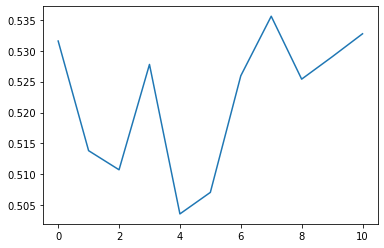

In [22]:
from sklearn.feature_selection import RFECV
n_jobs = 20
selector = RFECV(clf, 
                 step=features_r.shape[1]/10, 
                 cv=gkf, 
                 scoring='balanced_accuracy', 
                 verbose=0, 
                 n_jobs=5)

selector = selector.fit(features_r, y, groups=groups)

plt.plot(selector.grid_scores_)

Reading /data/tvanasse/nccam3/sub-2000/eeg/ses-1/awakening-7-cleaned2_nrem.fdt
component 1 sum of pca weights per channel
feature ranking: 1


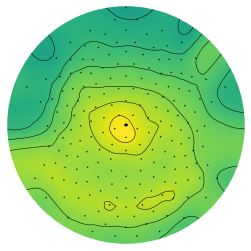

component 2 sum of pca weights per channel
feature ranking: 1


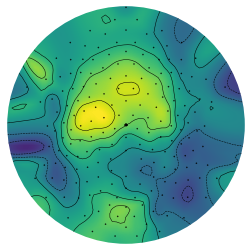

component 3 sum of pca weights per channel
feature ranking: 1


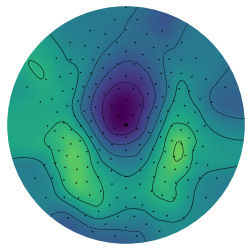

component 4 sum of pca weights per channel
feature ranking: 1


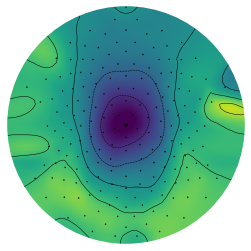

component 5 sum of pca weights per channel
feature ranking: 1


KeyboardInterrupt: 

In [27]:
import mne
raw = mne.io.read_raw_eeglab(data_folder + 'sub-2000/eeg/ses-1/awakening-7-cleaned2_nrem.set')

for comp in range(0,components):
#     if (selector.ranking_[comp] == 1) or (selector.ranking_[comp] == 2) or (selector.ranking_[comp] == 3) :
    if (selector.ranking_[comp] == 1):
        print("component " + str(comp+1) + " sum of pca weights per channel")
        print("feature ranking: " + str(selector.ranking_[comp]))
        channel_sum_ranking = []
        for i in range(0,185):
            end_shape = np.array(nrem_dataframe["TF"].values[0]).shape
            end_shape = (185, 20, 100)
            channel_sum_ranking.append(np.sum(pca.components_[comp].reshape(end_shape, order='F')[i,:,:]))
        # Plot the topography of ranking
        mne.viz.plot_topomap(np.array(channel_sum_ranking), 
                             raw.info, 
        #                      vmin=1, 
        #                      vmax=2, 
                             cmap=cm.viridis,)
        plt.show()

In [26]:
np.array(nrem_dataframe["TF"].values[0]).shape

(185, 20, 100, 2)

In [ ]:
print("Fit to top features: " + str(features_r[:,selector.ranking_ == 1].shape[1]))

n_splits=5

# create group k fold with n splits
gkf = GroupKFold(n_splits=n_splits)
print(gkf)

clf = svm.SVC(kernel='linear',
              class_weight='balanced'
             )

cv_object = cross_validate(clf, 
                           X=features_r[:,selector.ranking_ == 1], 
                           y=y,
                           cv=gkf,
                           n_jobs=n_jobs,
                           groups=groups,
                           scoring='balanced_accuracy')

print(cv_object)
print("Mean Bal. Acc: " + str(np.mean(cv_object['test_score'])))

In [108]:
## shuffled histogram

null_hist = []
n_splits = 3
n_jobs = 5

for i in range(0,50):
    
    y = nrem_dataframe["REPORT_BINARY"].values
    random.shuffle(y)
    
    # create group k fold with n splits
    gkf = GroupKFold(n_splits=n_splits)

    clf = svm.SVC(kernel='linear',
                  class_weight='balanced'
                 )

    selector = RFECV(clf, 
                     step=features_r.shape[1]/10, 
                     cv=gkf, 
                     scoring='balanced_accuracy', 
                     verbose=0, 
                     n_jobs=n_jobs)

    selector = selector.fit(features_r, 
                            y, 
                            groups=groups)
    
#     plt.plot(selector.grid_scores_)
#     plt.show()

    cv_object = cross_validate(clf, 
                               X=features_r[:,selector.ranking_ == 1], 
                               y=y,
                               cv=gkf,
                               n_jobs=n_jobs,
                               groups=groups,
                               scoring='balanced_accuracy')

    print("Mean Bal. Acc: " + str(np.mean(cv_object['test_score'])))
    null_hist.append(np.mean(cv_object['test_score']))

Mean Bal. Acc: 0.5315547939376346
Mean Bal. Acc: 0.5061203611203612
Mean Bal. Acc: 0.5185485906229715
Mean Bal. Acc: 0.5416299903799905
Mean Bal. Acc: 0.5376991651615618
Mean Bal. Acc: 0.5322779176789671
Mean Bal. Acc: 0.5292879102244543
Mean Bal. Acc: 0.5439359538393118
Mean Bal. Acc: 0.5406627966632725
Mean Bal. Acc: 0.5271037648657334
Mean Bal. Acc: 0.5744747287718558
Mean Bal. Acc: 0.5876026305325056
Mean Bal. Acc: 0.5449979336606828
Mean Bal. Acc: 0.5255158546171064
Mean Bal. Acc: 0.5427061666380967
Mean Bal. Acc: 0.5273623847034902
Mean Bal. Acc: 0.5098261373842448
Mean Bal. Acc: 0.55673477756168
Mean Bal. Acc: 0.5535579350317201
Mean Bal. Acc: 0.5516926171080802
Mean Bal. Acc: 0.5249760500585413
Mean Bal. Acc: 0.5211925115788061
Mean Bal. Acc: 0.5341924547596816
Mean Bal. Acc: 0.5481924444077252
Mean Bal. Acc: 0.5140864732394471
Mean Bal. Acc: 0.5681151812522715
Mean Bal. Acc: 0.521075221329602
Mean Bal. Acc: 0.5330033907146583
Mean Bal. Acc: 0.5464690666755738
Mean Bal. Acc: 0.

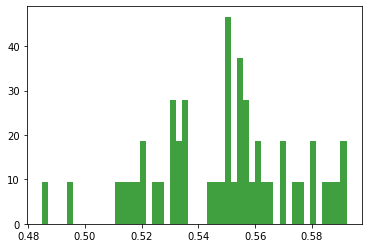

In [93]:
# the histogram of the data
n, bins, patches = plt.hist(np.array(null_hist), 20, density=True, facecolor='g', alpha=0.75)